In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

In [25]:
df=pd.read_csv('data (1).csv')

In [26]:
df.head()

Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor       4.6   
1           1  Volkswagen                       ID.3 Pure      10.0   
2           2    Polestar                               2       4.7   
3           3         BMW                            iX3        6.8   
4           4       Honda                              e        9.5   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

In [27]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161             940            1        AWD   
1       270              167             250            0        RWD   
2       400              181             620            1        AWD   
3       360              206             560            1        RWD   
4       170              168             190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  4615.9360  
1  Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2  Type 2 CCS   Liftback       D      5      56440  4695.8080  
3  Type 2 CCS        SUV       D      5      68040  5660.9280  
4  Type 2 CCS  Hatchback       B      4      32997  2745.3504

In [28]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

Brand                           Model  AccelSec  TopSpeed_KmH  Range_Km  \
0   Tesla    Model 3 Long Range Dual Motor       4.6           233       450   
3     BMW                             iX3        6.8           180       360   
8   Tesla      Model 3 Standard Range Plus       5.6           225       310   
13    BMW                              i4        4.0           200       450   
21  Tesla    Model Y Long Range Dual Motor       5.1           217       425   
24  Tesla   Model 3 Long Range Performance       3.4           261       435   
28    BMW                        i3 120 Ah       7.3           150       235   
33  Tesla             Cybertruck Tri Motor       3.0           210       750   
40  Tesla               Model S Long Range       3.8           250       515   
51  Tesla                        Roadster        2.1           410       970   
54  Tesla               Model X Long Range       4.6           250       450   
59  Tesla              Model S Performance       2.5           261       505   
61  Tesla   Model Y Long Range Performance       3.7           241       410   
67  Tesla            Cybertruck Dual Motor       5.0           190       460   
70    BMW                       i3s 120 Ah       6.9           160       230   
81  Tesla              Model X Performance       2.8           250       440   
86  Tesla          Cybertruck Single Motor       7.0           180       390   

    Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain    PlugType  \
0               161             940            1        AWD  Type 2 CCS   
3               206             560            1        RWD  Type 2 CCS   
8               153             650            1        RWD  Type 2 CCS   
13              178             650            1        RWD  Type 2 CCS   
21              171             930            1        AWD  Type 2 CCS   
24              167             910            1        AWD  Type 2 CCS   
28              161             270            0        RWD  Type 2 CCS   
33              267             710            1        AWD  Type 2 CCS   
40              184             560            1        AWD      Type 2   
51              206             920            1        AWD  Type 2 CCS   
54              211             490            1        AWD      Type 2   
59              188             550            1        AWD      Type 2   
61              177             900            1        AWD  Type 2 CCS   
67              261             710            1        AWD  Type 2 CCS   
70              165             260            1        RWD  Type 2 CCS   
81              216             480            1        AWD      Type 2   
86              256             740            0        RWD  Type 2 CCS   

    BodyStyle Segment  Seats  PriceEuro   inr(10e3)  
0       Sedan       D      5      55480   4615.9360  
3         SUV       D      5      68040   5660.9280  
8       Sedan       D      5      46380   3858.8160  
13      Sedan       D      5      65000   5408.0000  
21        SUV       D      7      58620   4877.1840  
24      Sedan       D      5      61480   5115.1360  
28  Hatchback       B      4      38017   3163.0144  
33     Pickup       N      6      75000   6240.0000  
40   Liftback       F      5      79990   6655.1680  
51     Cabrio       S      4     215000  17888.0000  
54        SUV       F      7      85990   7154.3680  
59   Liftback       F      5      96990   8069.5680  
61        SUV       D      7      65620   5459.5840  
67     Pickup       N      6      55000   4576.0000  
70  Hatchback       B      4      41526   3454.9632  
81        SUV       F      7     102990   8568.7680  
86     Pickup       N      6      45000   3744.0000

# Information of the type of data in seach column

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


# Finding out the number of null values

In [20]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

# Descriptive Statistics of the dataset

In [21]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.000000    103.000000  103.000000       103.000000      103.000000   
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

       RapidCharge       Seats      PriceEuro     inr(10e3)  
count   103.000000  103.000000     103.000000    103.000000  
mean      0.747573    4.883495   55811.563107   4643.522050  
std       0.436529    0.795834   34134.665280   2840.004151  
min       0.000000    2.000000   20129.000000   1674.732800  
25%       0.500000    5.000000   34429.500000   2864.534400  
50%       1.000000    5.000000   45000.000000   3744.000000  
75%       1.000000    5.000000   65000.000000   5408.000000  
max       1.000000    7.000000  215000.000000  17888.000000

In [22]:
df.duplicated().sum()

0

In [30]:
import plotly.io as pio
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)
     

In [31]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)
     

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

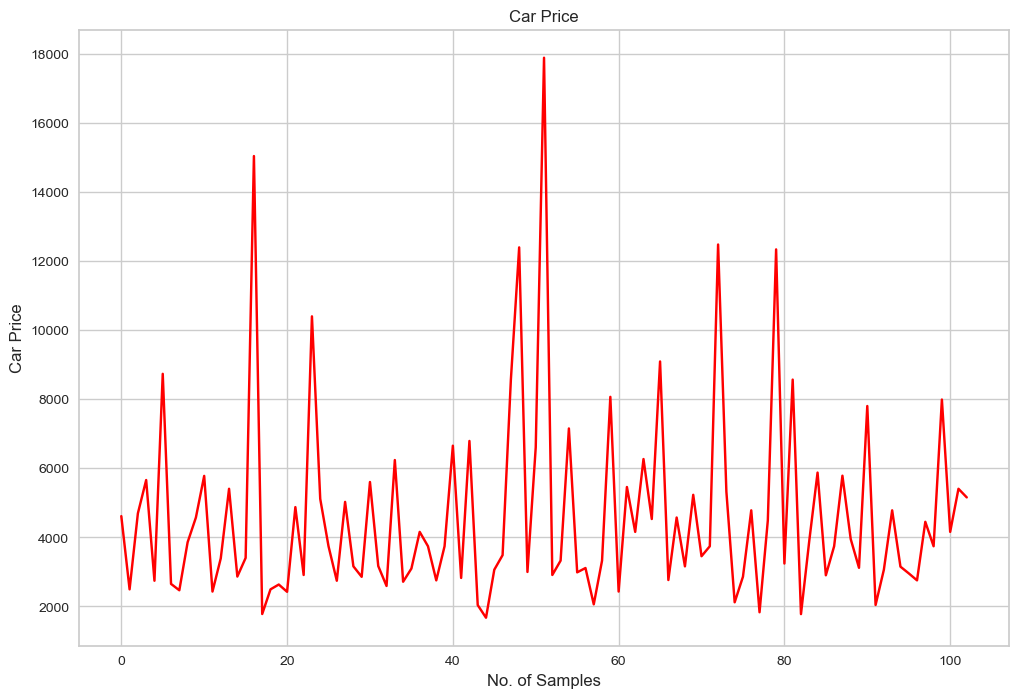

In [32]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')
     

In [34]:
df.describe()

Car_name Car_price Batter_cap          Drive_range      Power  \
count            30        30         27                   30         30   
unique           30        29         16                   18         18   
top     MG Comet EV    1.9 cr   17.3 kWh  230  km/full charge  41.42 Bhp   
freq              1         2          2                    2          2   

       Charge_time transmission Boot_space Top_speed  
count           30           28         12         6  
unique          14           12          2         4  
top      Automatic    Automatic  Automatic   200kmph  
freq             7           12         10         3

In [33]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

In [34]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)
     

In [36]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
     

In [37]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
     

In [38]:
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)
     

In [39]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

# Pairplot of all the columns based on Rapid Charger presence


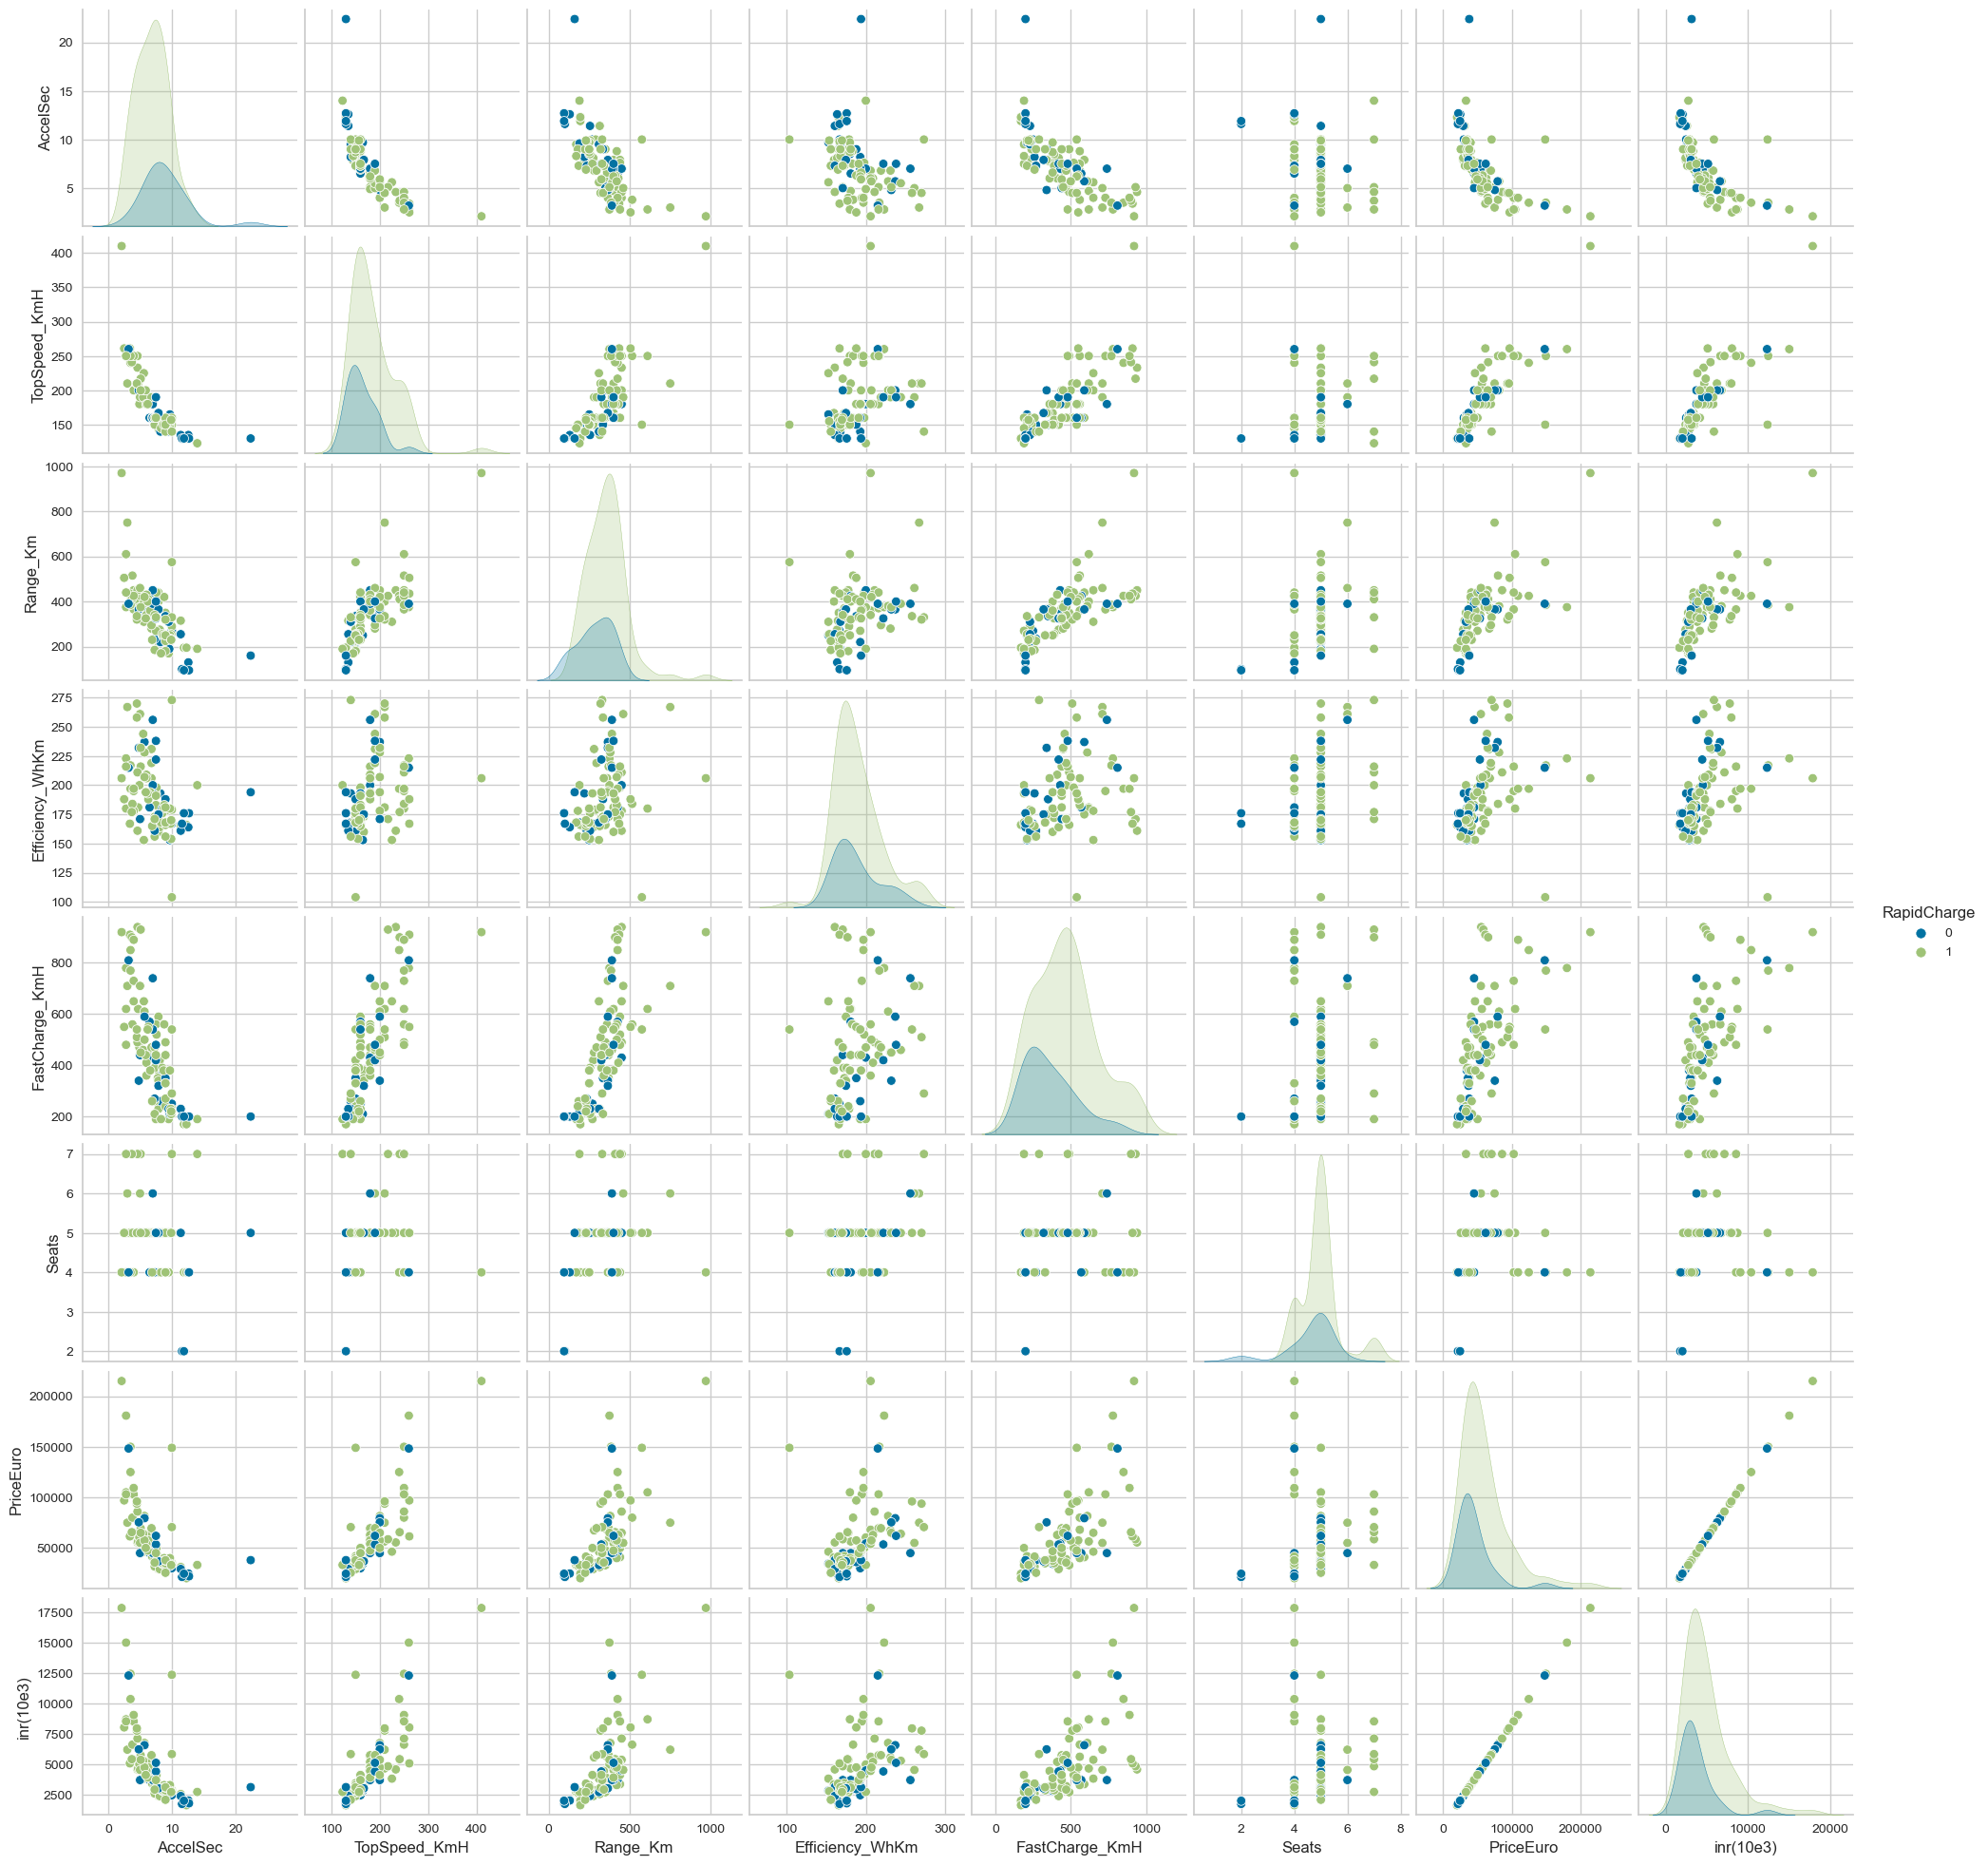

In [42]:
import seaborn as sns
sns.pairplot(df,hue='RapidCharge')

# Heatmap to show the correlation of the data

C:\Users\admin\AppData\Local\Temp\ipykernel_9040\3510681572.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

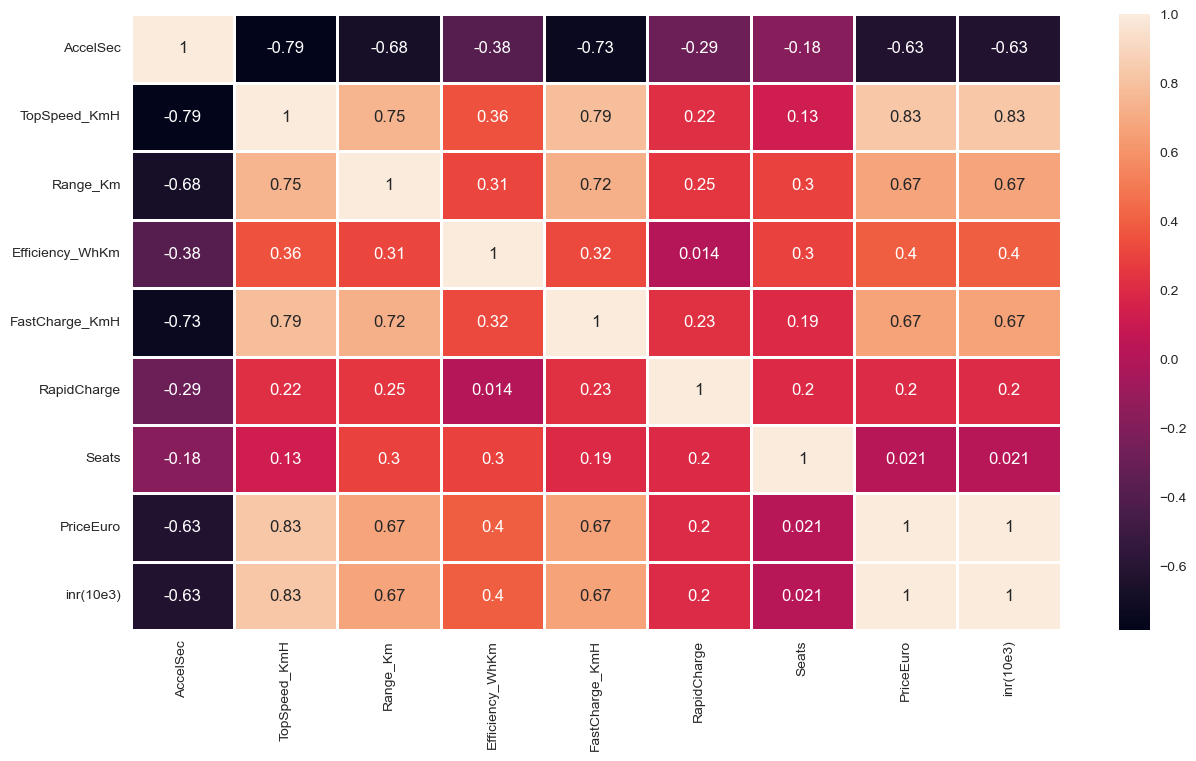

In [43]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [44]:
a=np.arange(1,104)

# Making Some Comparisions for our dataset

Frequency of the Brands in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

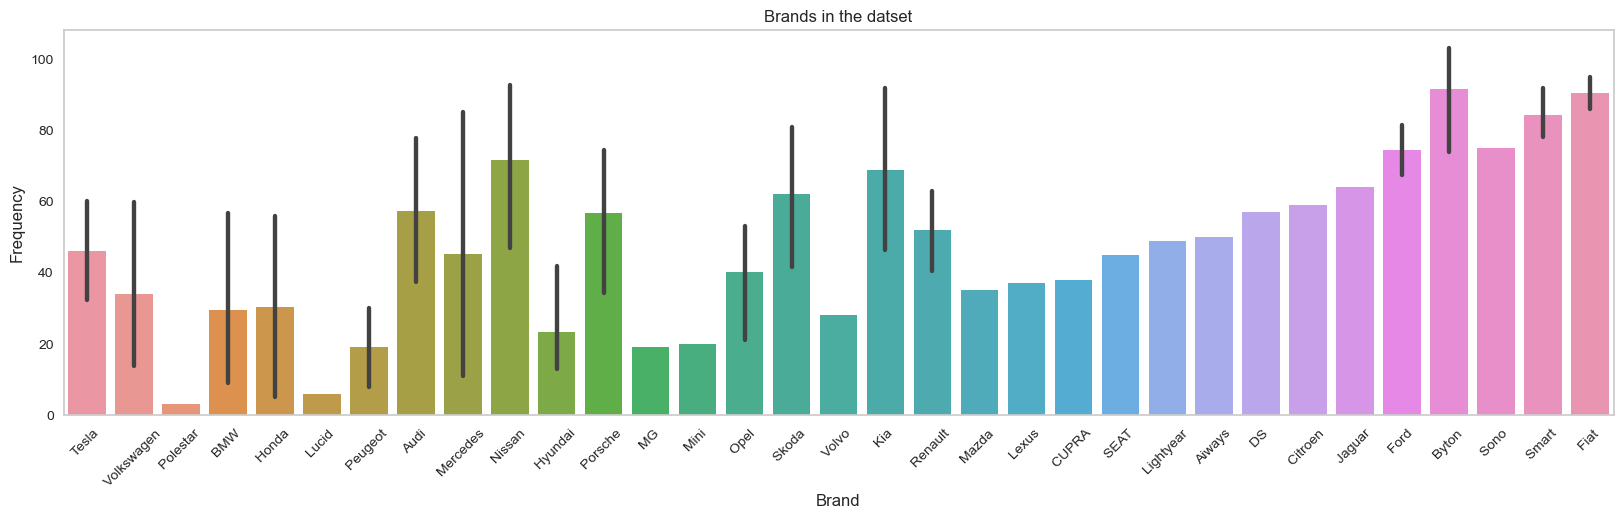

In [45]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton , Fiat and smart are the prominent brands and Polestar being the least

# Top speeds achieved by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

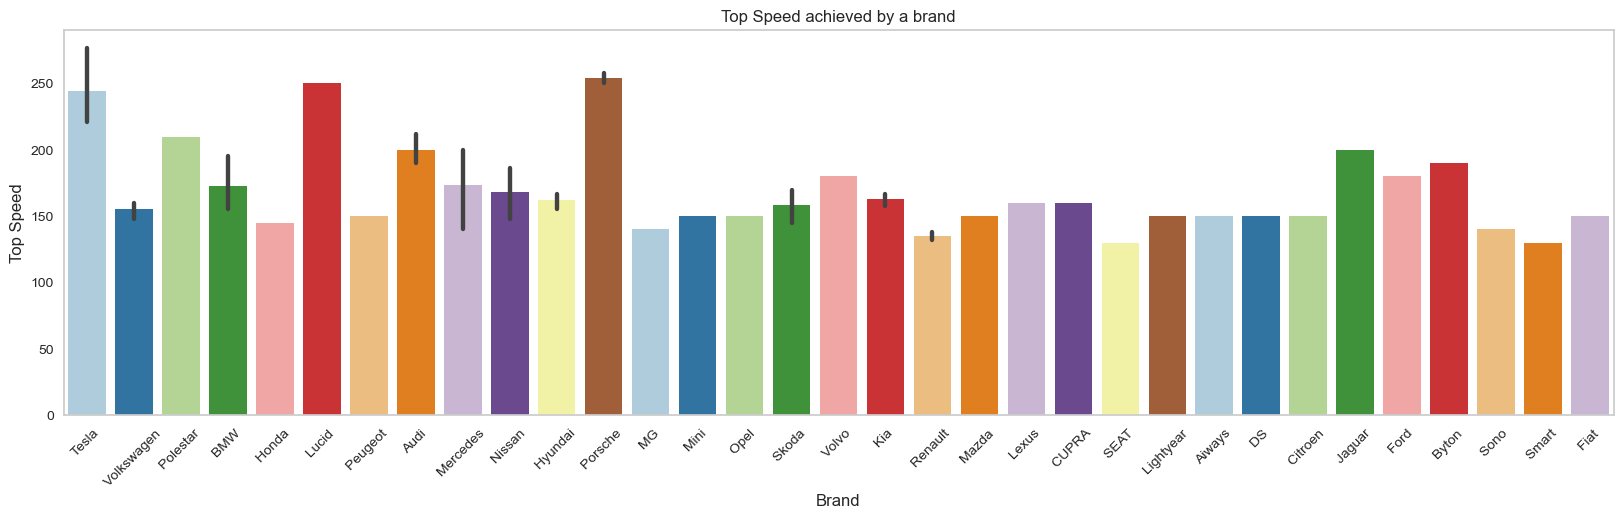

In [46]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
     

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

# Range a car can achieve

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

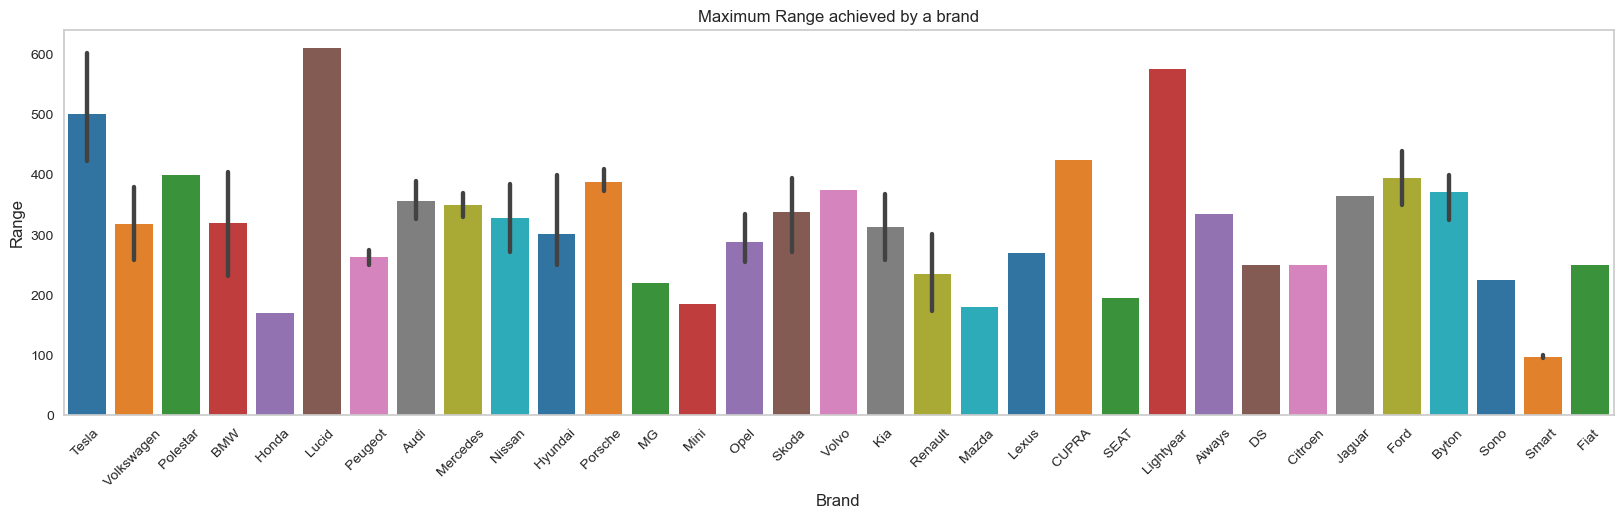

In [47]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

# Car efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

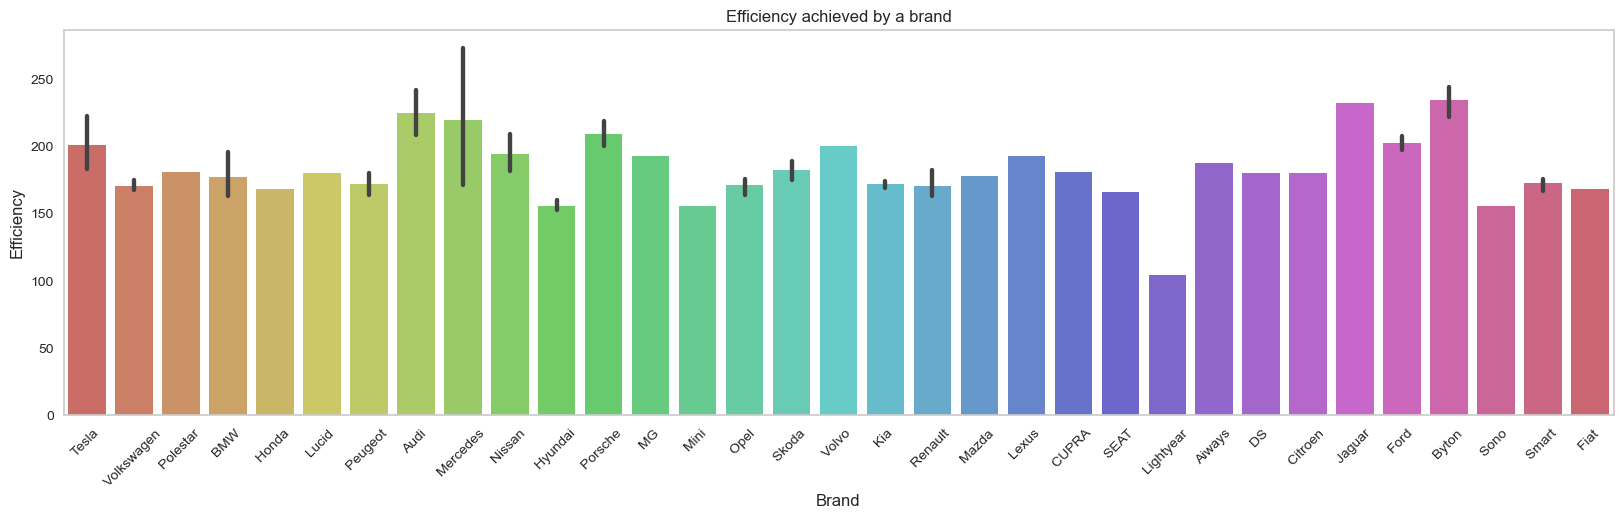

In [48]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton , Jaguar and Audi are the most efficient and Lightyear the least

# Number of seats in each car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

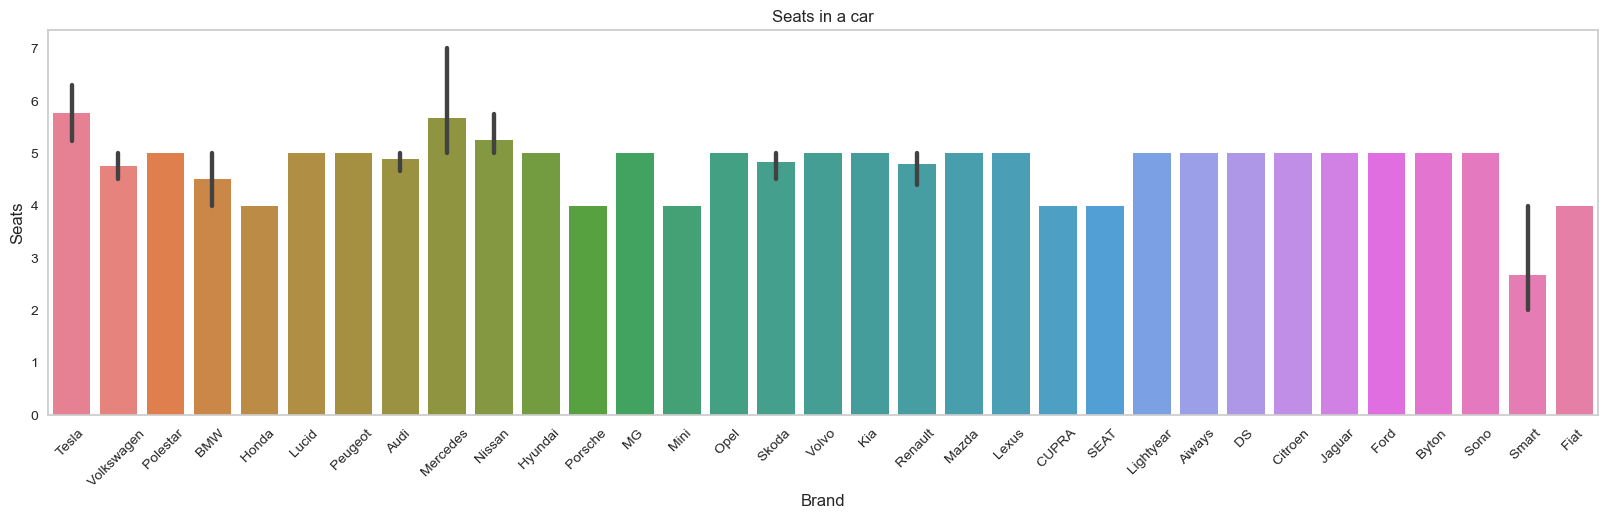

In [49]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

# Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

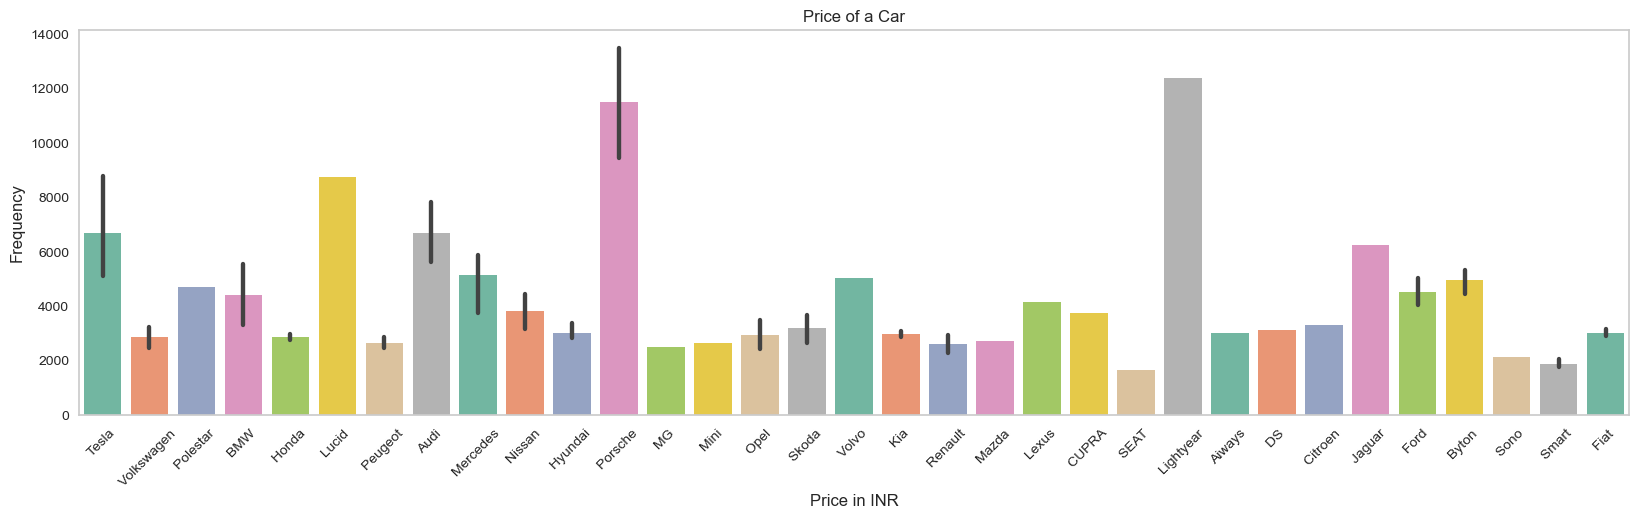

In [50]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

# Type of Plug used for charging

Text(0.5, 1.0, 'Plug Type')

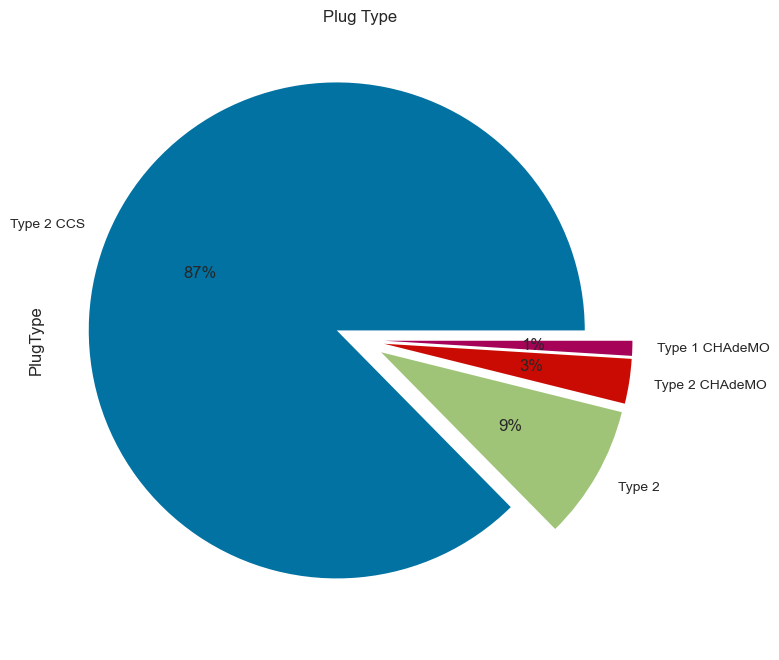

In [51]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least



# Cars and their body style

Text(0.5, 1.0, 'Body Style')

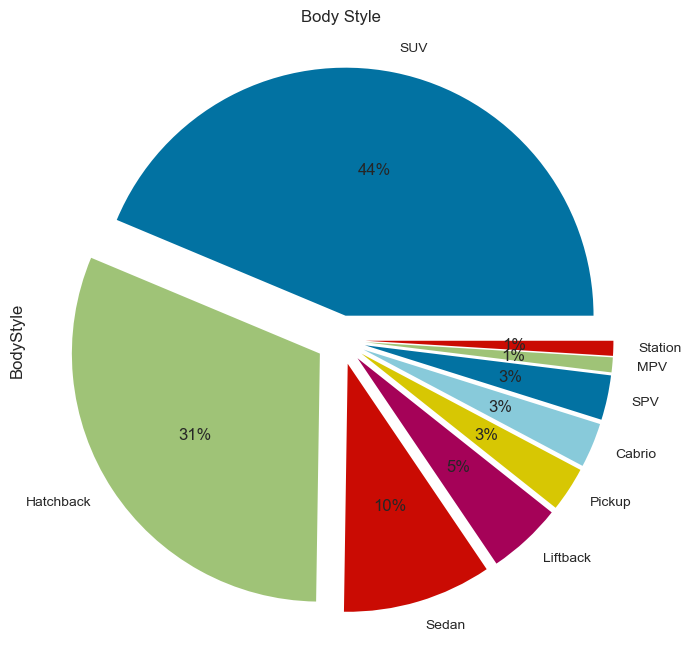

In [52]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')
     

Most cars are eiher SUV or Hatchback

# Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

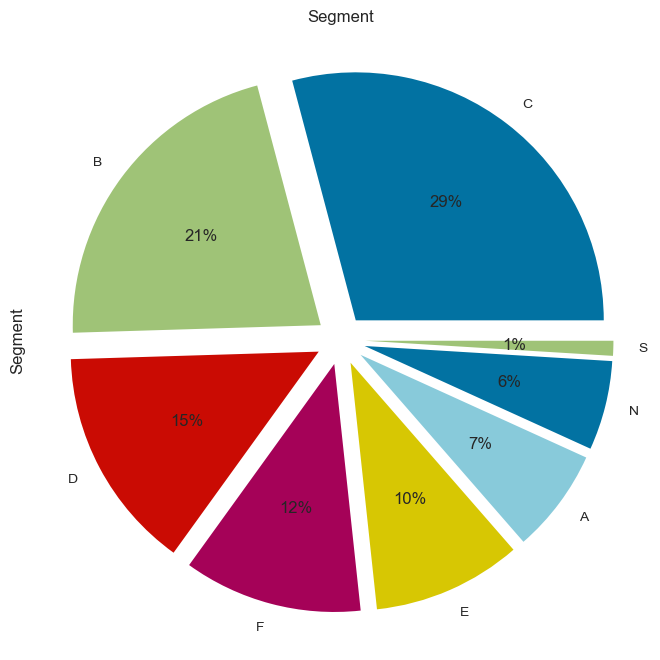

In [53]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')
     

Most cars are either C or B type

# Number of Seats

Text(0.5, 1.0, 'Seats')

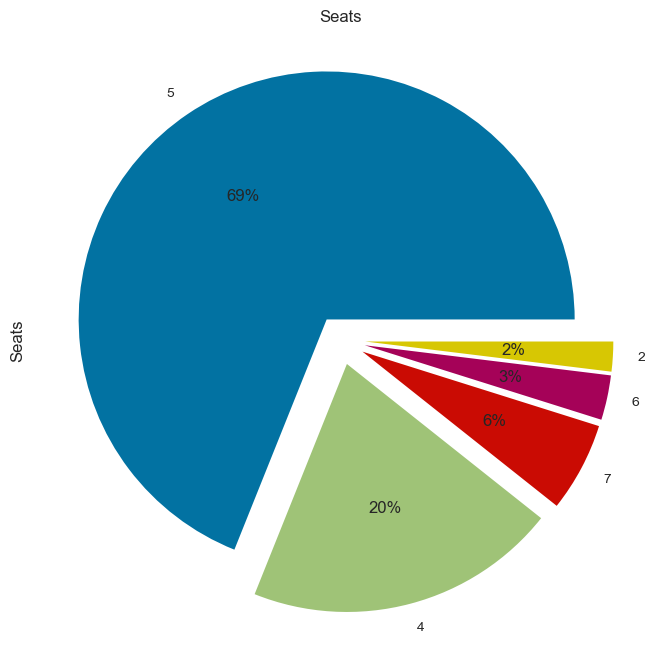

In [54]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [55]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()
     

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

In [56]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

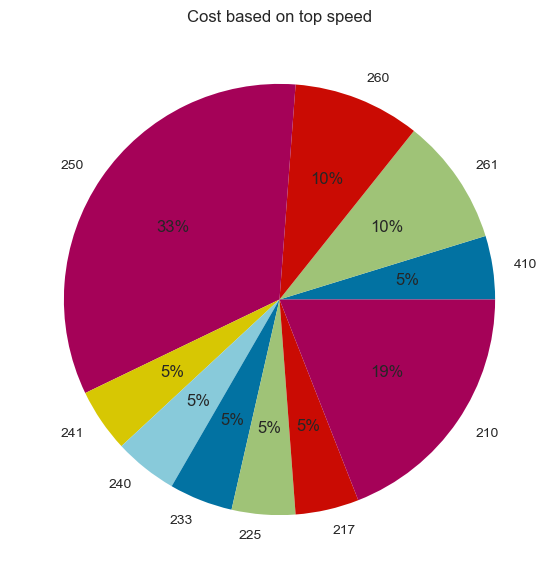

In [57]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

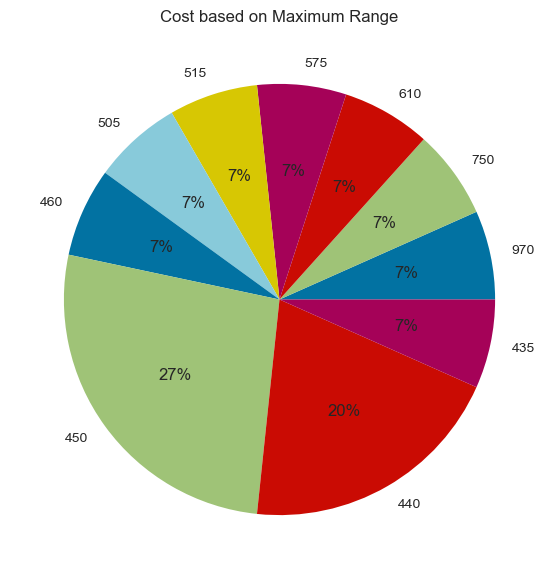

In [58]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

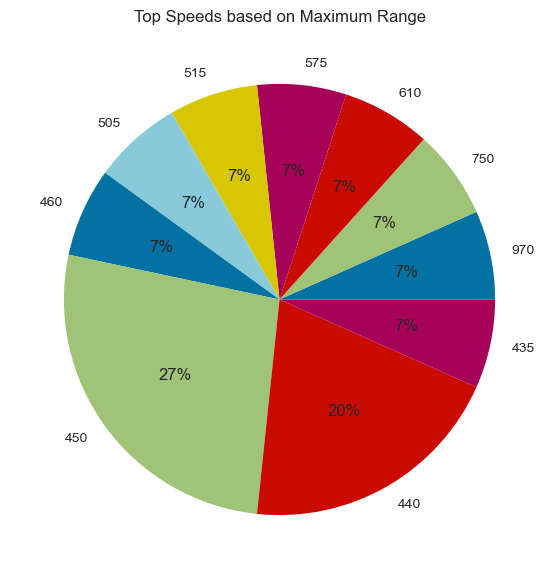

In [59]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Model building

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

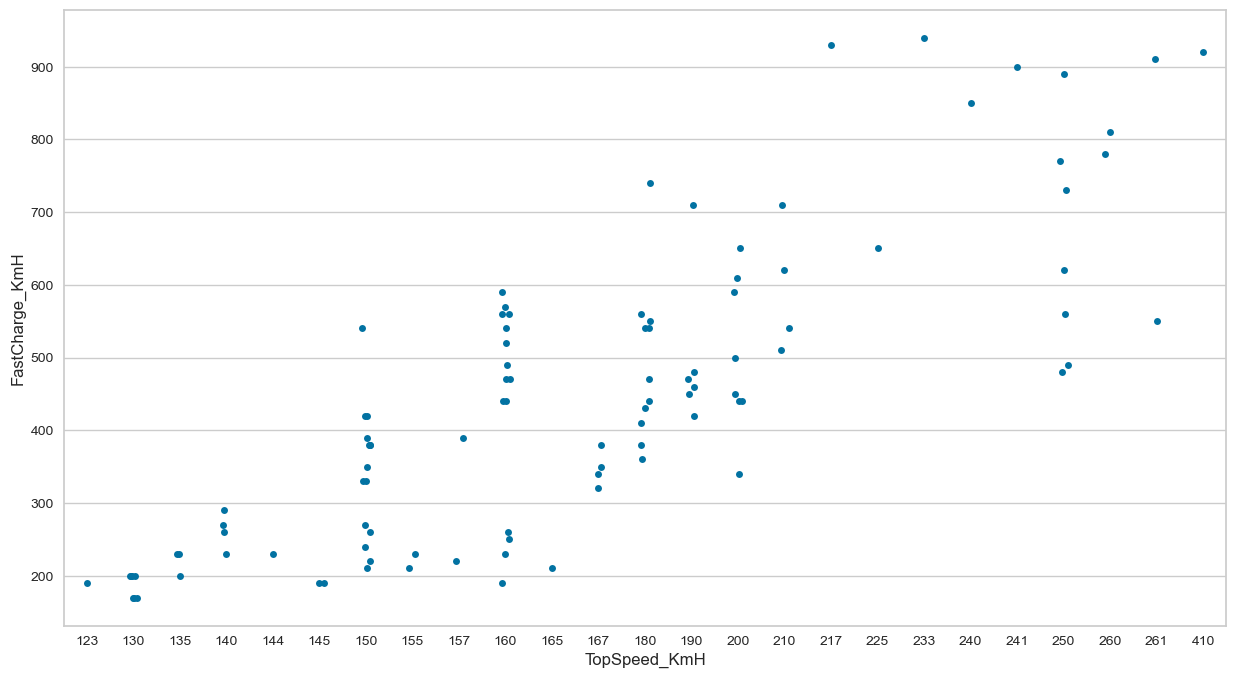

In [61]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)
     

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

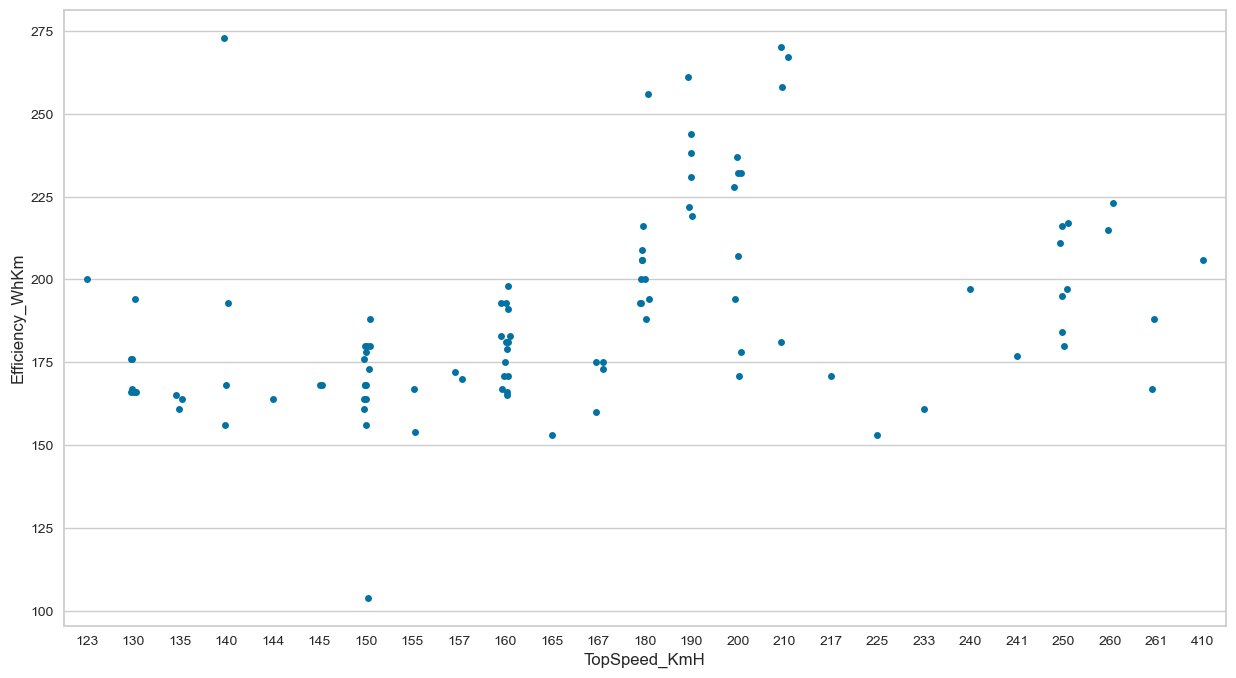

In [62]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [63]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0         450              161             940            1        AWD   
1         270              167             250            0        RWD   
2         400              181             620            1        AWD   
3         360              206             560            1        RWD   
4         170              168             190            1        RWD   
..        ...              ...             ...          ...        ...   
98        330              191             440            1        FWD   
99        335              258             540            1        AWD   
100       325              194             440            1        AWD   
101       375              232             450            1        AWD   
102       400              238             480            0        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0    Type 2 CCS      Sedan       D      5      55480  4615.9360  
1    Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2    Type 2 CCS   Liftback       D      5      56440  4695.8080  
3    Type 2 CCS        SUV       D      5      68040  5660.9280  
4    Type 2 CCS  Hatchback       B      4      32997  2745.3504  
..          ...        ...     ...    ...        ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  3744.0000  
99   Type 2 CCS        SUV       E      5      96050  7991.3600  
100  Type 2 CCS  Hatchback       C      5      50000  4160.0000  
101  Type 2 CCS  Hatchback       C      5      65000  5408.0000  
102  Type 2 CCS        SUV       E      5      62000  5158.4000  

[103 rows x 15 columns]

In [69]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)

In [70]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [71]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2
     

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0    2.429225 -0.554599 -1.147772 -0.882791  0.839988 -0.959297  0.998880   
1   -2.322483 -0.345449  0.896473 -1.305529  0.079598  0.235116 -0.213678   
2    1.587851  0.008899 -0.650523  0.041024  0.593537 -0.698248  0.058718   
3    0.291018 -0.000150 -0.307702 -0.514196 -1.608861  0.291624  0.364999   
4   -2.602679 -0.626489 -0.888088  0.585294 -0.802108  0.027387 -0.084955   
..        ...       ...       ...       ...       ...       ...       ...   
98  -0.297170  0.446713 -0.463601  0.102542 -0.346005 -0.100457  0.031080   
99   2.335018  0.630747  0.985883  1.560112 -0.817327 -0.121906  0.164115   
100  0.780642  0.426821 -0.298636  0.708598  0.481728 -0.540071 -0.139753   
101  1.540920  0.698754  0.422384  1.094921 -0.298113 -0.307992 -0.363230   
102  0.915051  0.261495  2.410642  0.188002  0.340820  0.015609 -0.171875   

          PC8       PC9  
0    0.711148 -0.396662  
1   -0.544135 -0.181867  
2    0.248837 -0.202775  
3   -0.235543  0.261663  
4   -0.507790 -0.049904  
..        ...       ...  
98   0.202253  0.145390  
99  -0.255651  0.141023  
100 -0.048733 -0.367509  
101  0.127251 -0.190397  
102  0.567633 -0.200822  

[103 rows x 9 columns]

In [72]:
df_9=data2.iloc[:,:9]
df_9.head(3)

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0  2.429225 -0.554599 -1.147772 -0.882791  0.839988 -0.959297  0.998880   
1 -2.322483 -0.345449  0.896473 -1.305529  0.079598  0.235116 -0.213678   
2  1.587851  0.008899 -0.650523  0.041024  0.593537 -0.698248  0.058718   

        PC8       PC9  
0  0.711148 -0.396662  
1 -0.544135 -0.181867  
2  0.248837 -0.202775

In [73]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
PC1      -0.396410  0.086150  0.064757  0.058253  0.144548  0.676910   
PC2       0.421973 -0.216762  0.002272 -0.068523  0.038208  0.045212   
PC3       0.238316  0.330919  0.571780  0.380475 -0.575143  0.024863   
PC4       0.394519 -0.138428 -0.047650 -0.296483 -0.092366 -0.237914   
Pc5       0.157195  0.269920 -0.803300  0.395300 -0.292581  0.086978   
PC6       0.389544 -0.024746 -0.076295 -0.387135 -0.032841  0.364461   
PC7       0.140425  0.801307  0.019535 -0.428983  0.165256  0.086668   
PC8       0.389779 -0.262265  0.073787  0.179862  0.043293  0.558706   
PC9       0.322888  0.180494  0.098293  0.486554  0.722814 -0.149888   

               PC7       PC8       PC9  
variable                                
PC1       0.412498  0.270655 -0.324562  
PC2       0.037576 -0.413810 -0.770777  
PC3       0.004703  0.144167 -0.098954  
PC4       0.728208  0.358365  0.105702  
Pc5       0.053875  0.040830 -0.056056  
PC6      -0.520811  0.534180 -0.038015  
PC7       0.098379 -0.320750  0.079999  
PC8       0.118043 -0.382139  0.517207  
PC9      -0.019098  0.265275 -0.033267

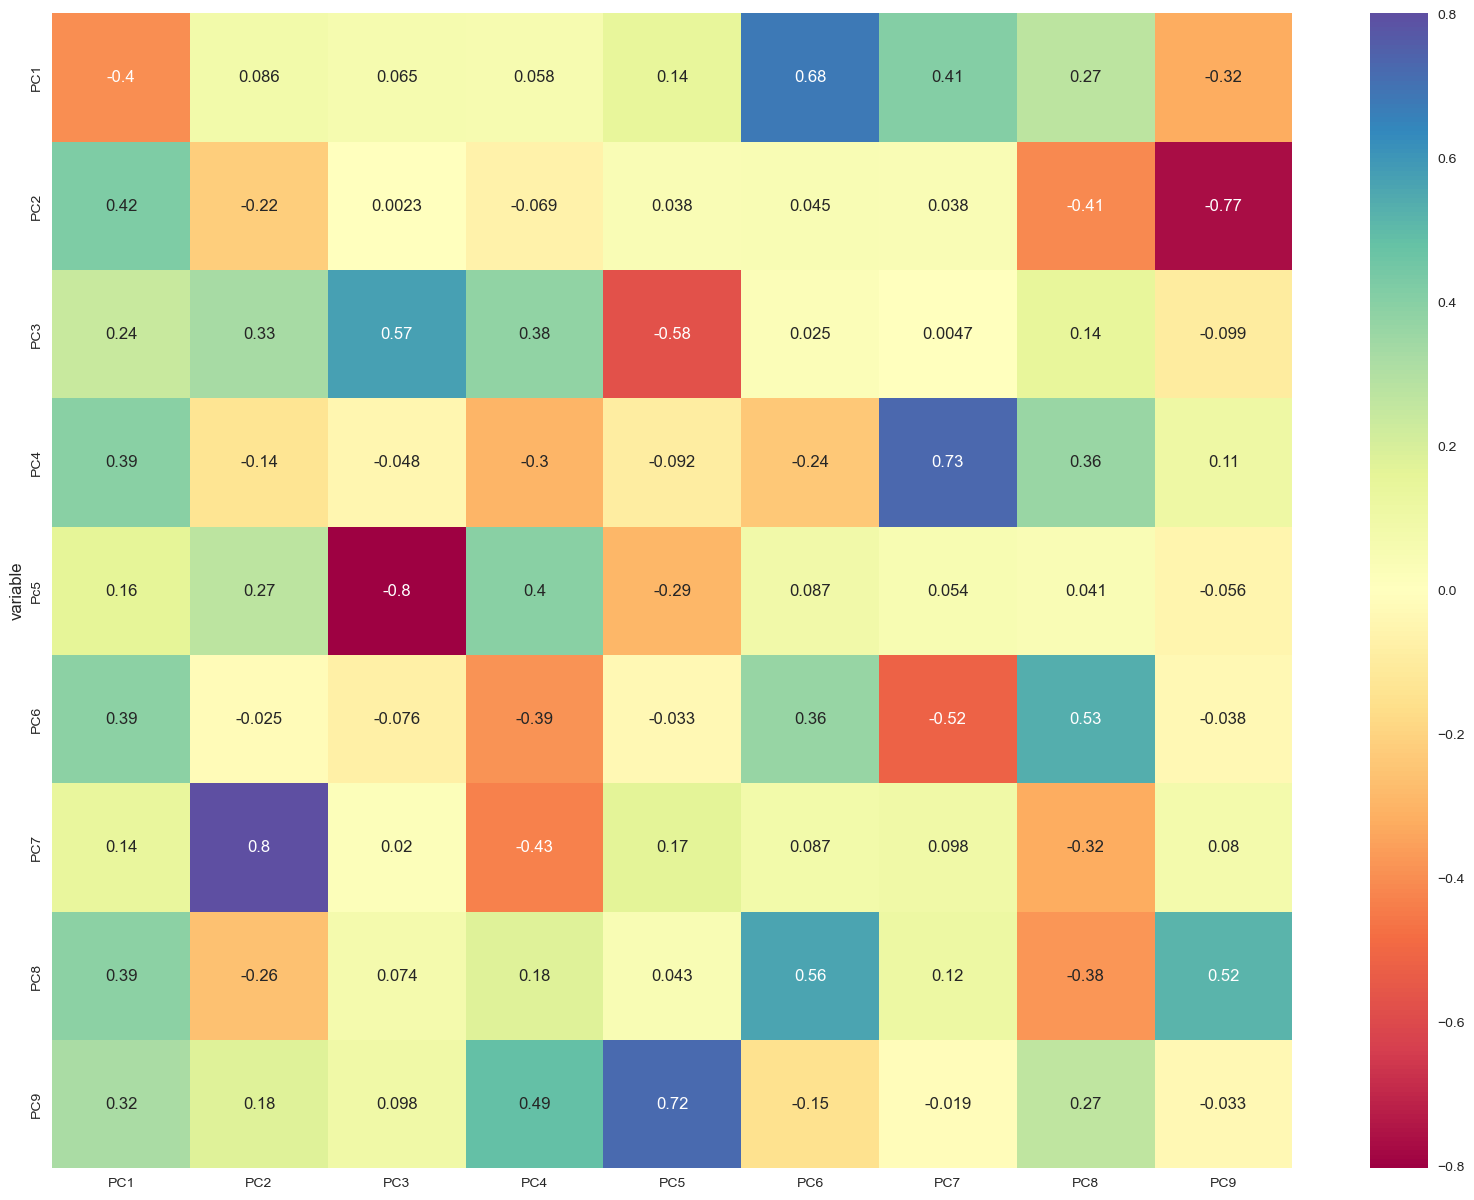

In [75]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

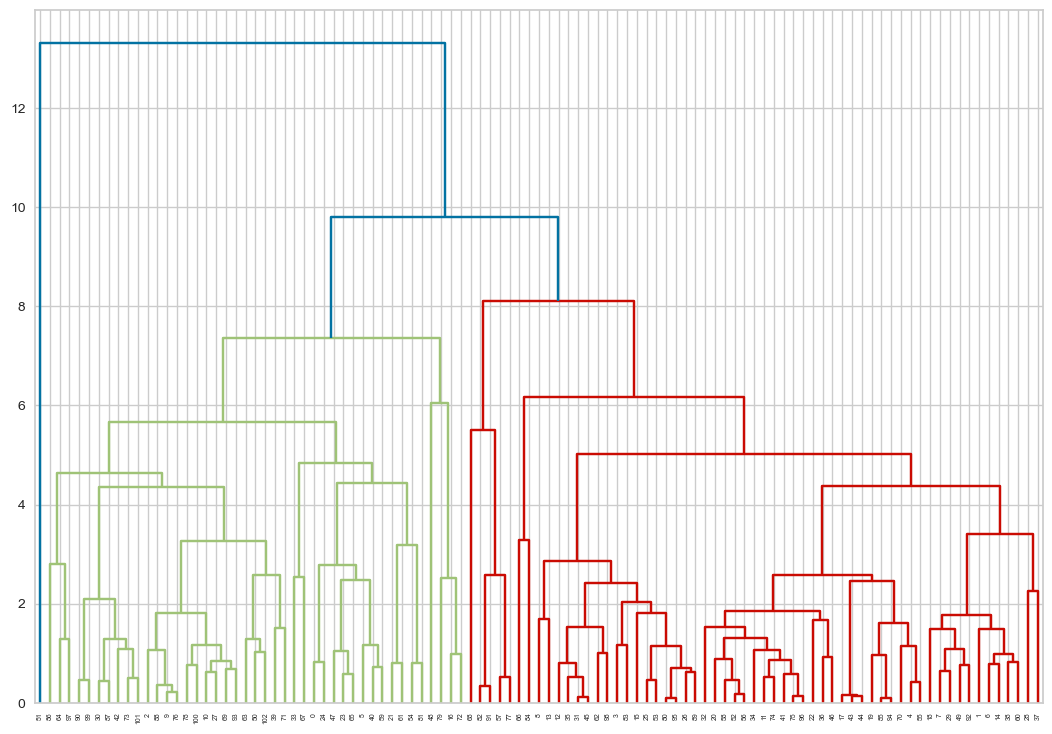

In [76]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

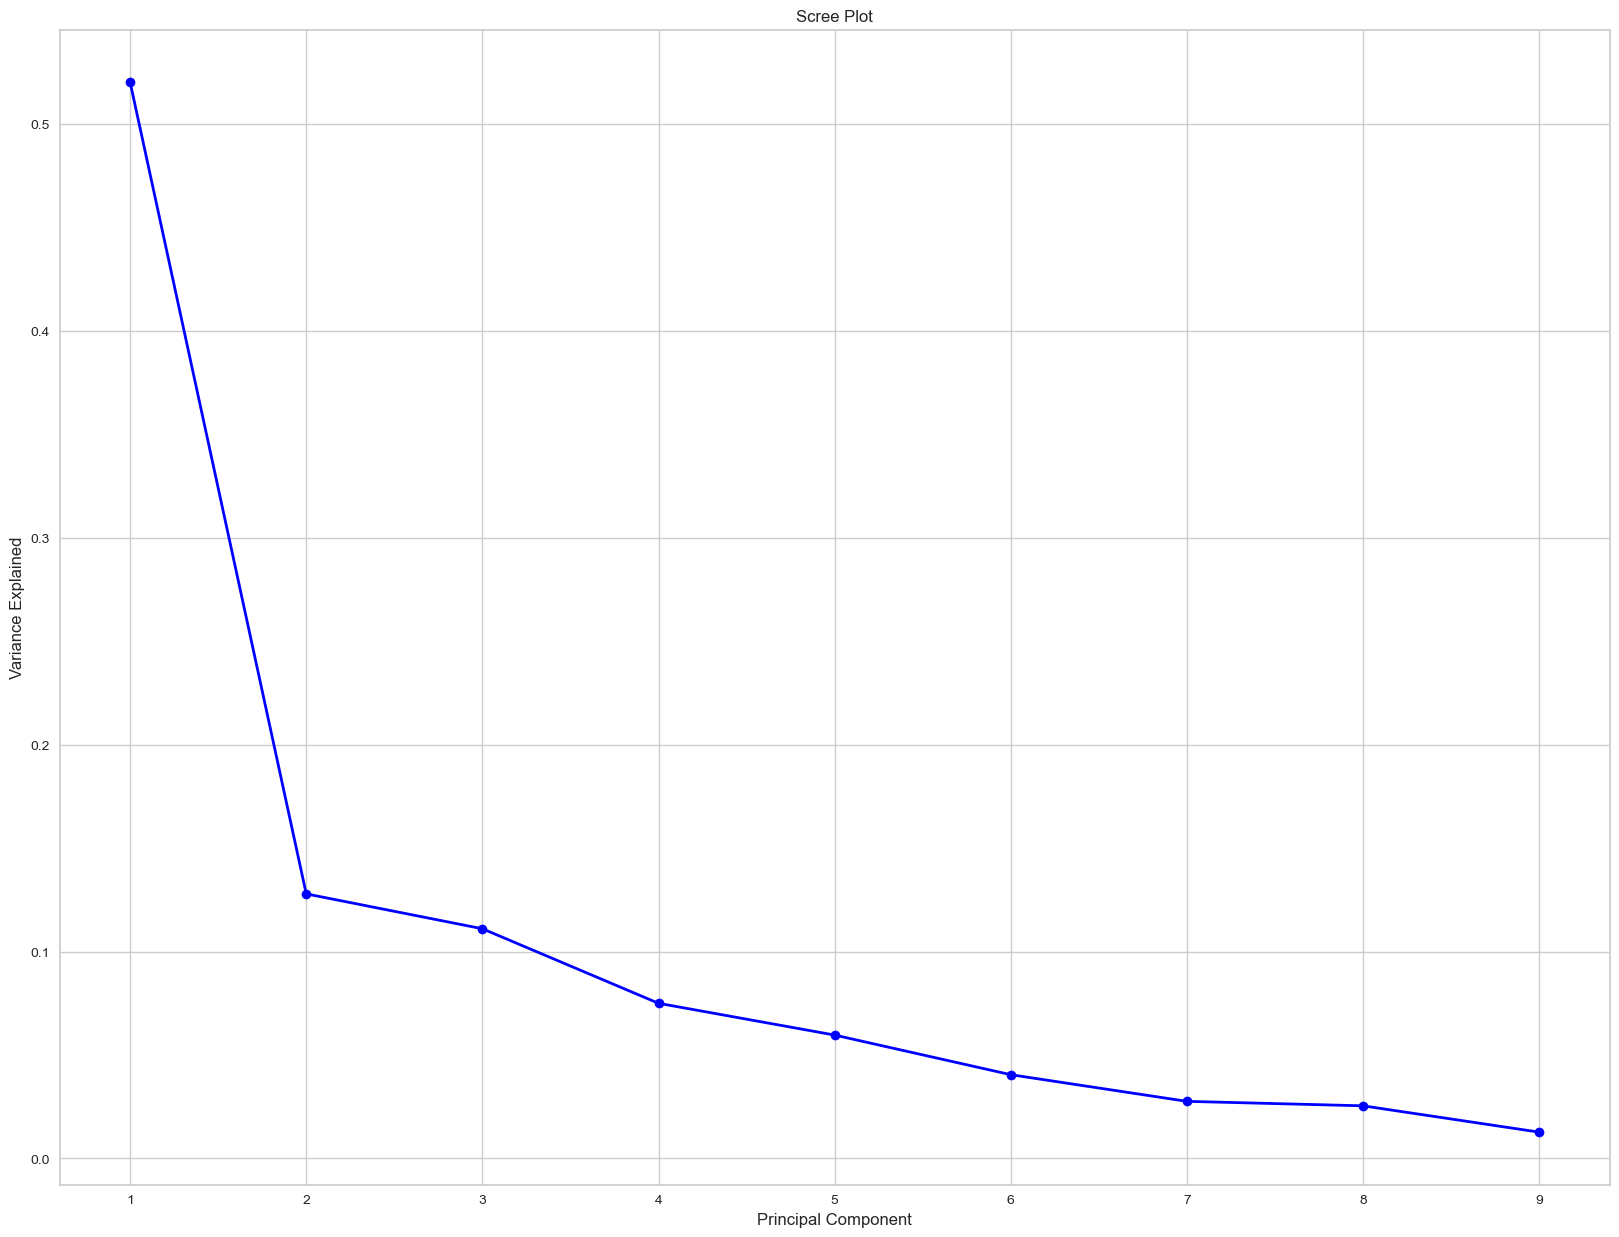

In [77]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adm

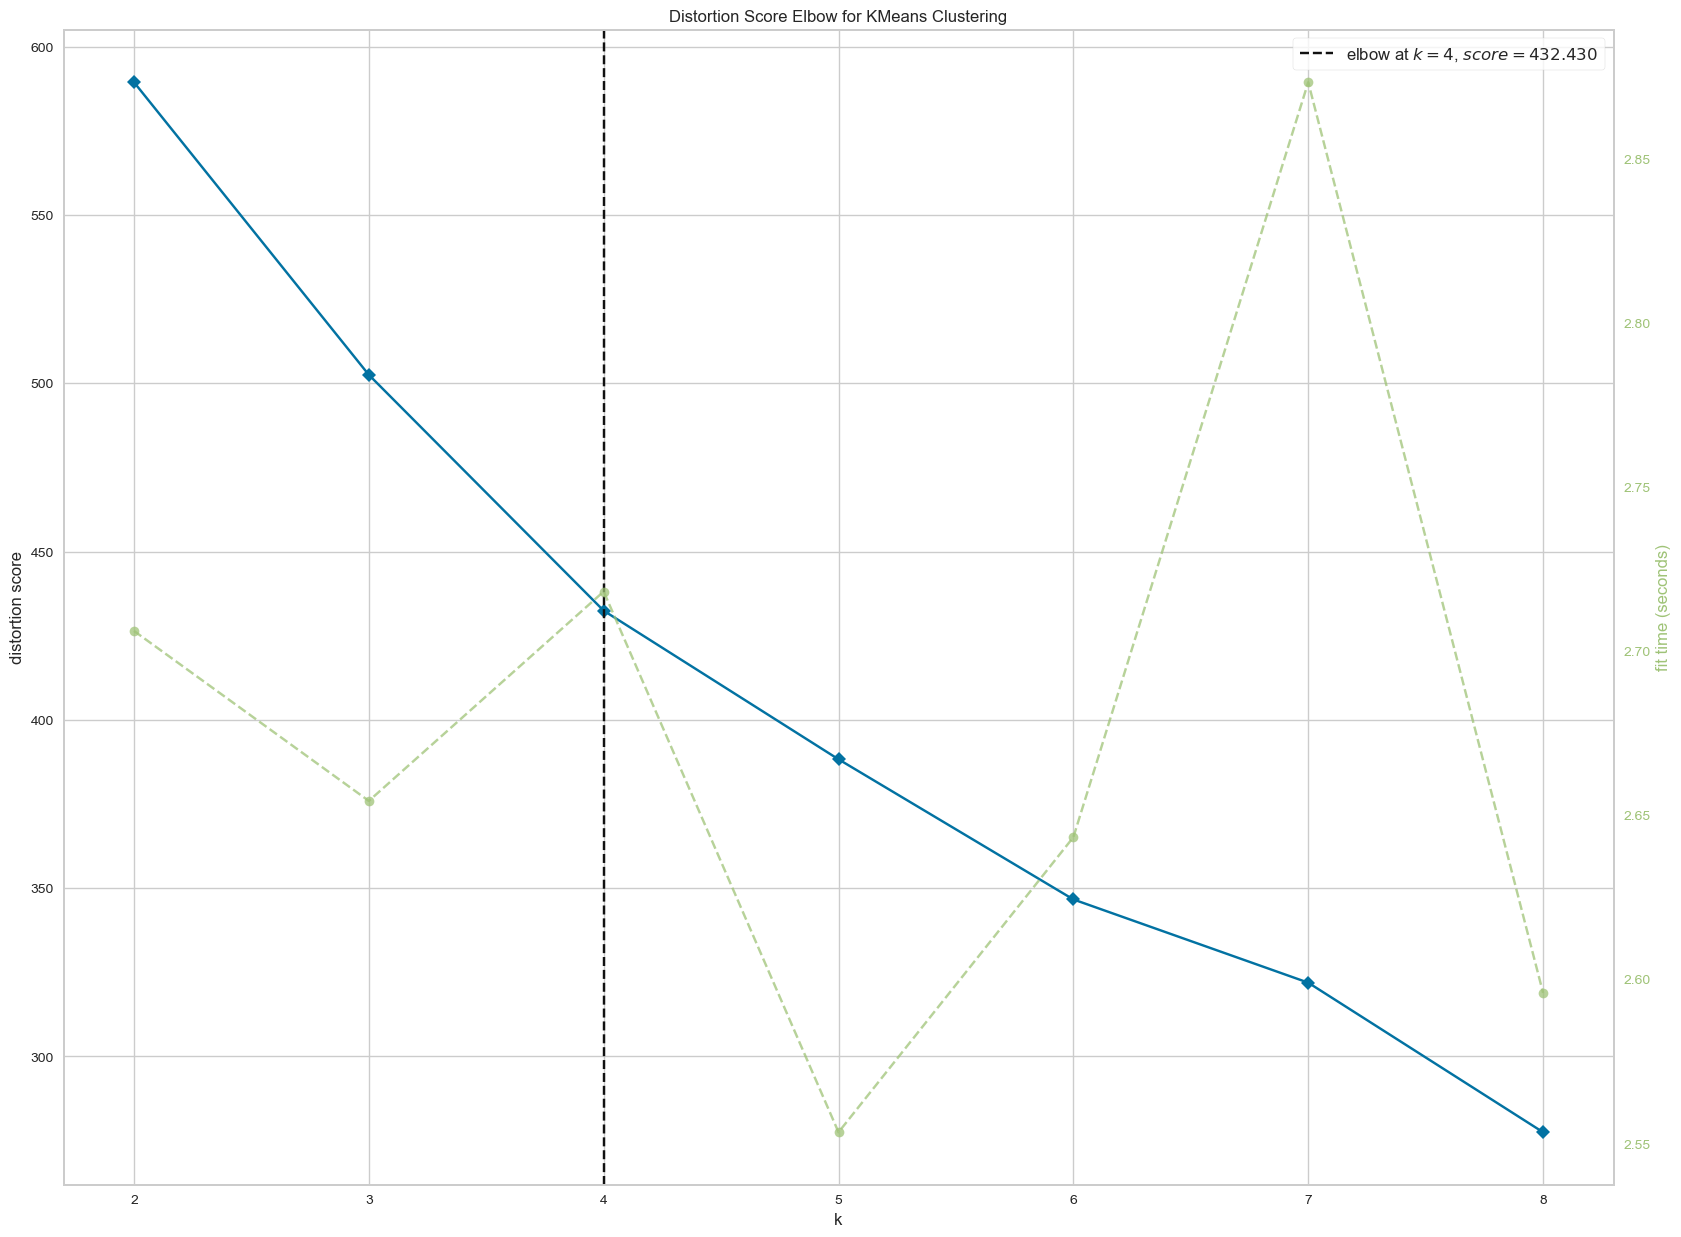

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adm

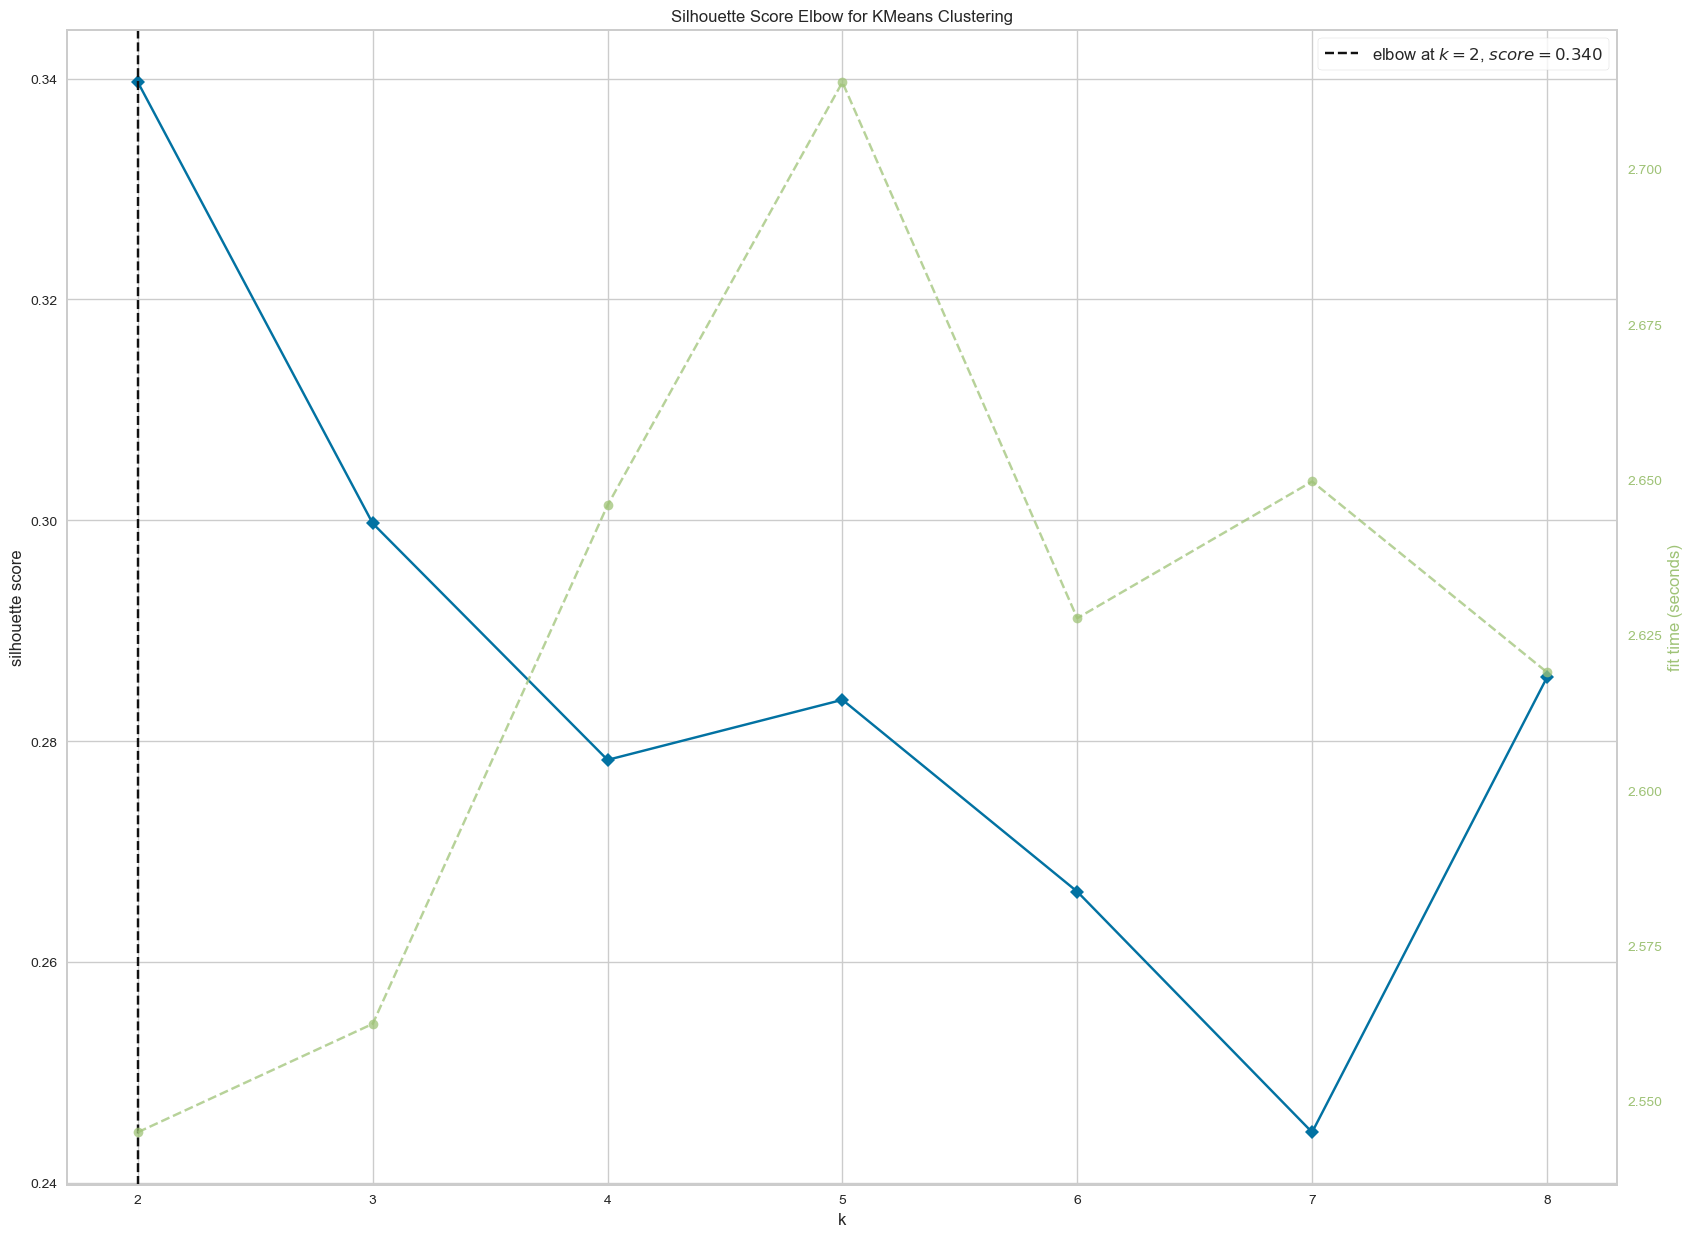

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adm

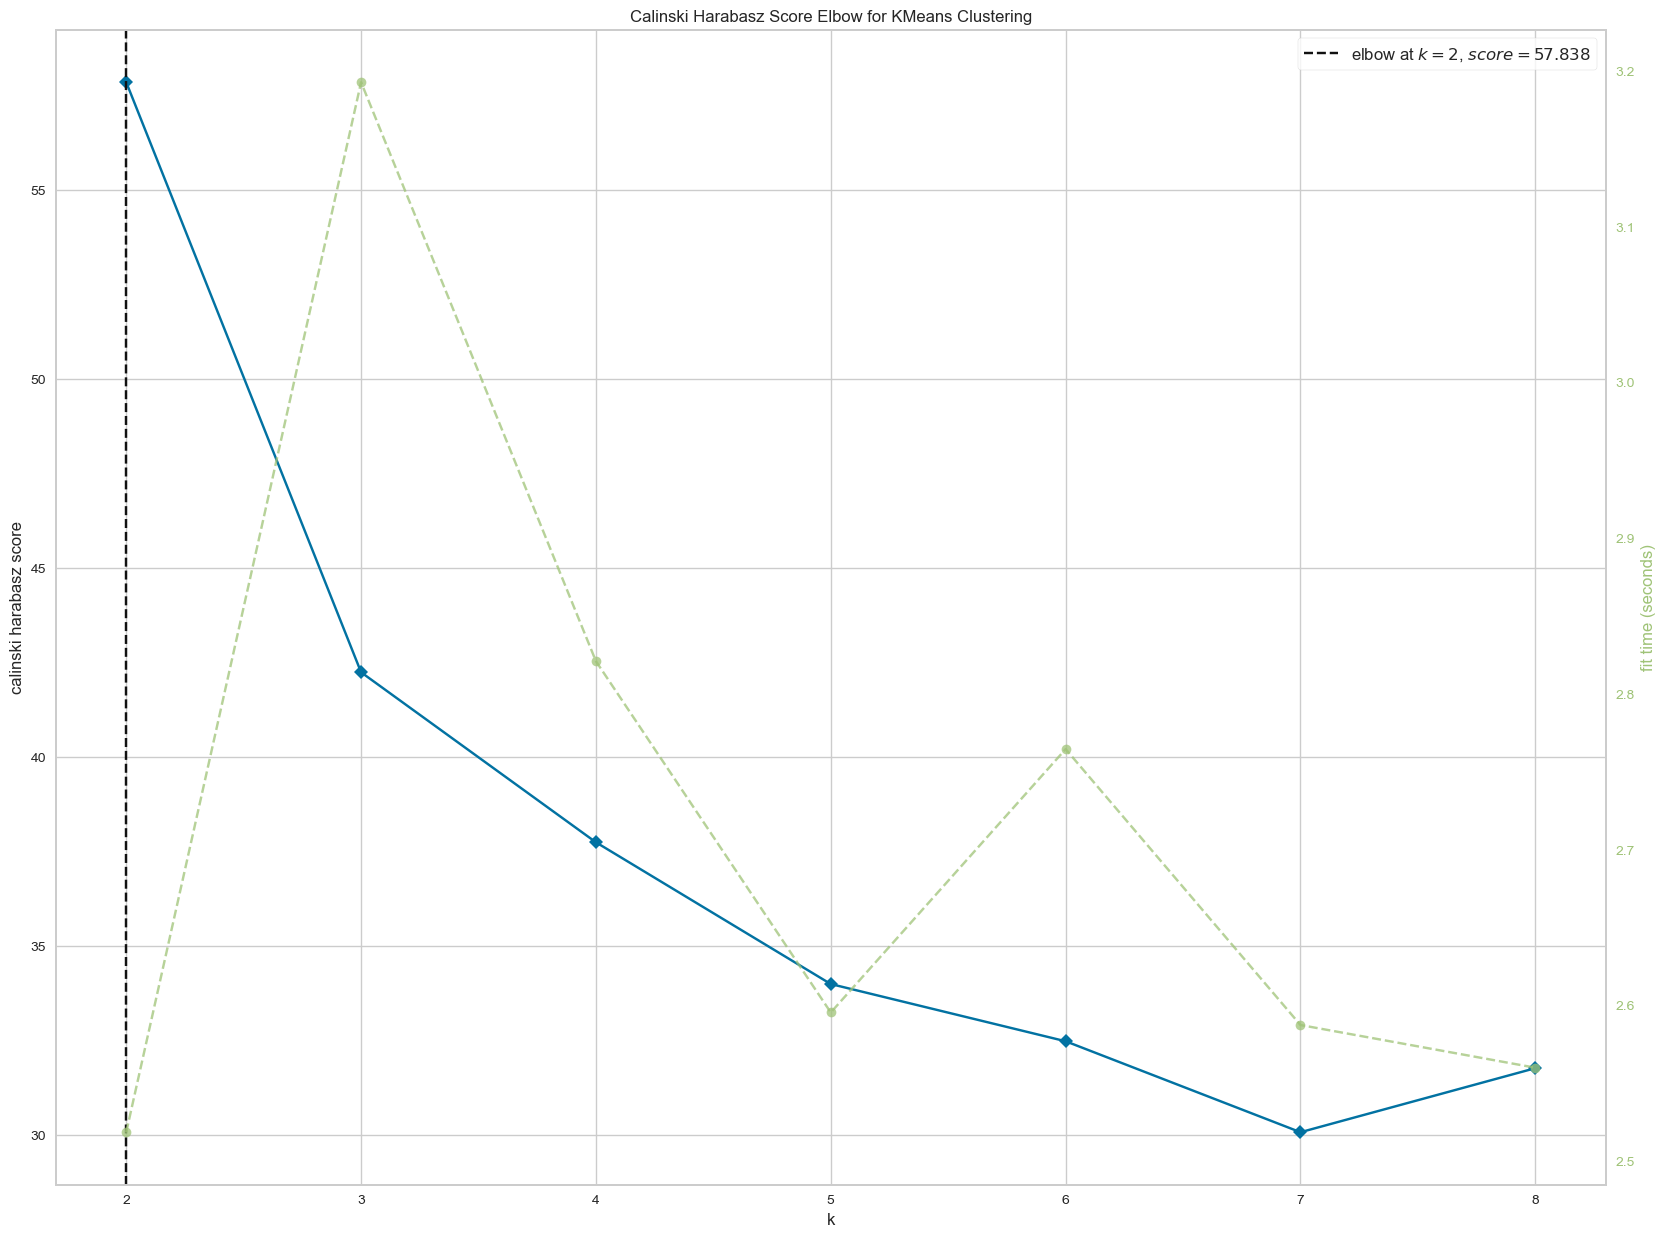

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [80]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
     

In [81]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.
     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.8874684517357
5
[[ 3.38080722 -1.38222959 -0.36489344  0.10476922  0.40601443  0.27185359
   0.24199669 -0.10661851  0.04313075]
 [-1.28035008  0.15751337 -0.80380172  0.03882667 -0.26171256  0.0576548
  -0.02518157 -0.04843479 -0.00967151]
 [ 1.47340441  0.75533302  0.44439293  0.22304959  0.00587772 -0.20900642
  -0.04639724  0.13707866  0.00747268]
 [-2.1666201  -0.64972069  1.15112147 -0.52704354  0.24950081  0.04766166
  -0.03574547 -0.05850103 -0.02224405]]


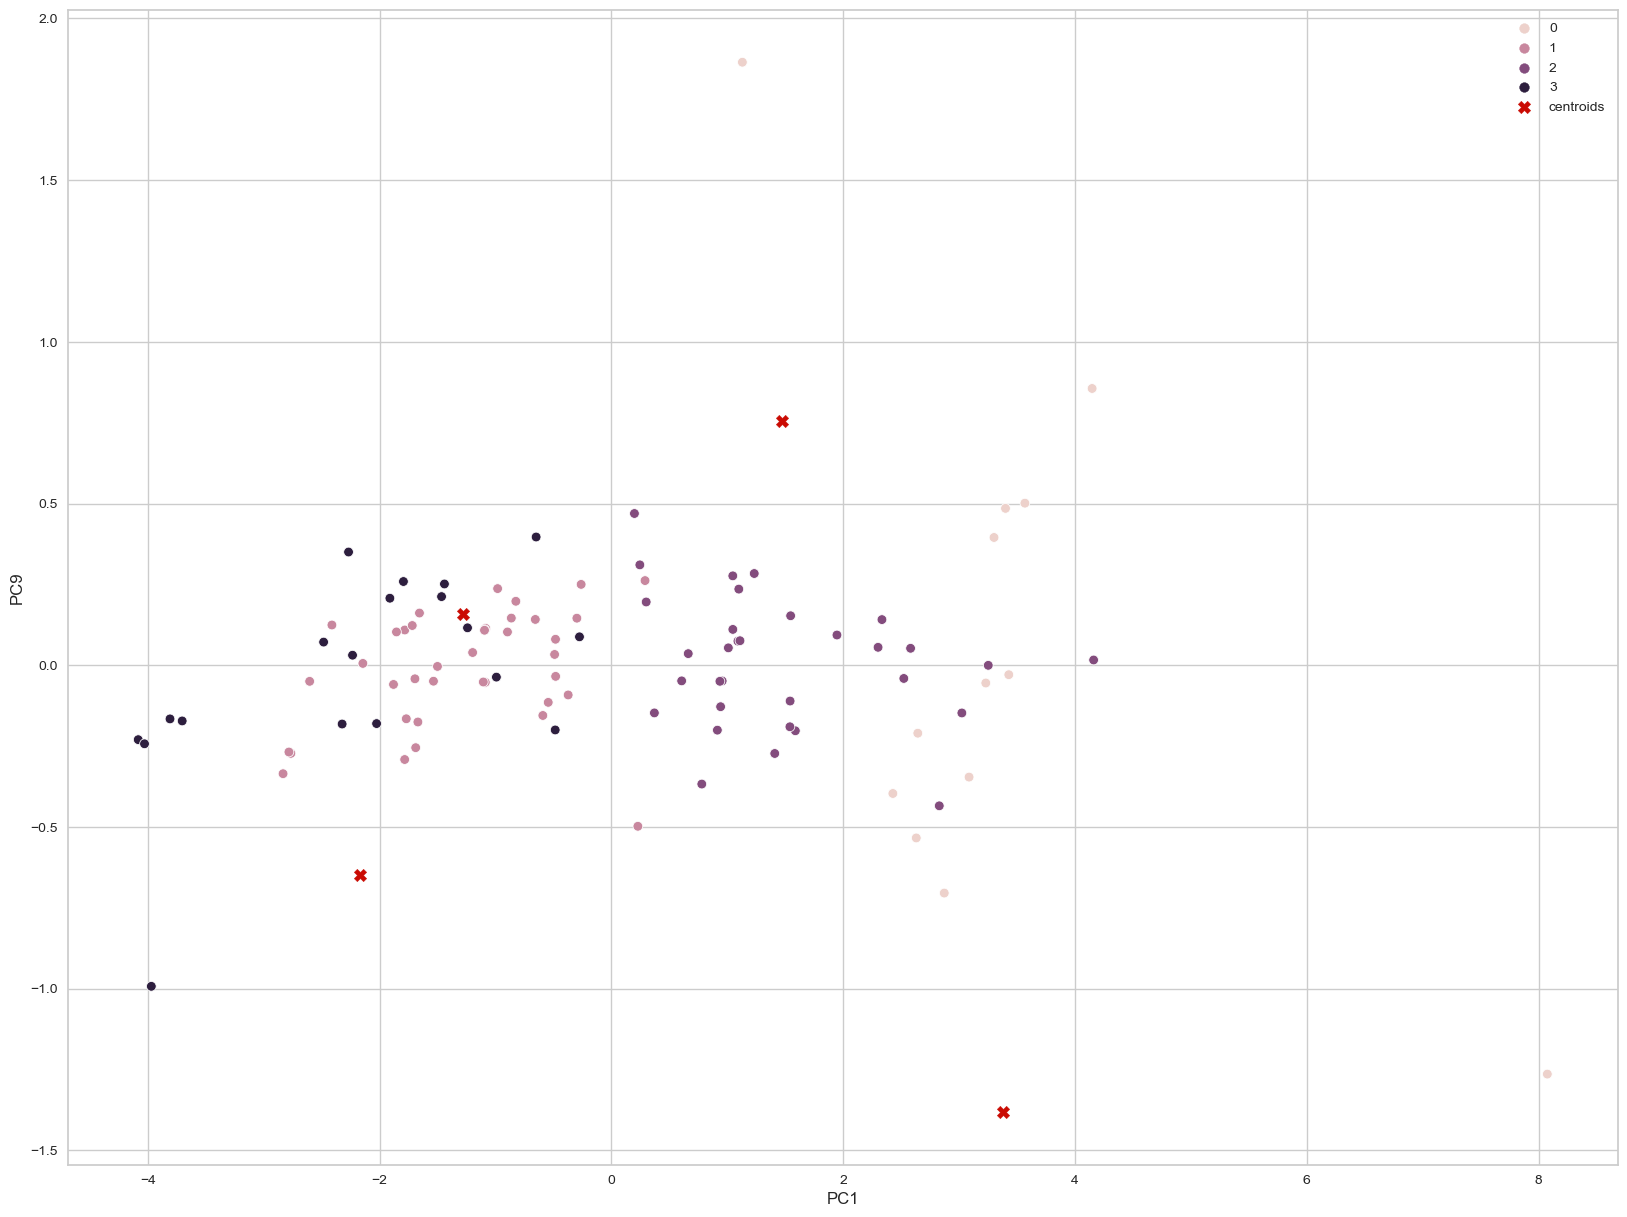

In [82]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()
     

In [ ]:
from sklearn.cluster import DBSCAN
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
dbscan_labels = dbscan.fit_predict(PCA_ds)  # Get the DBSCAN cluster labels


# Customer Segmentation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

In [2]:
df=pd.read_csv('behavioural_dataset.csv')

In [3]:
df

Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       2000000  1000000  
2            Yes       1800000  1200000  
3             No       2200000  1200000  
4            Yes       2600000  1600000  
..           ...           ...      ...  
94            No       2400000  1600000  
95            No       5100000  1600000  
96           Yes       2200000  1100000  
97            No       4000000  1500000  
98           Yes       2200000  1100000  

[99 rows x 8 columns]

In [4]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [9]:
df.shape

(99, 8)

In [10]:
df.head()

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan  Total Salary    Price  
0           Yes        800000   800000  
1           Yes       2000000  1000000  
2           Yes       1800000  1200000  
3            No       2200000  1200000  
4           Yes       2600000  1600000

# Data Cleaning

In [11]:
df['Profession'].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

In [12]:
df['Marrital Status'].value_counts()

Married    84
Single     15
Name: Marrital Status, dtype: int64

In [13]:
df['Education'].value_counts()

Post Graduate    56
Graduate         43
Name: Education, dtype: int64

In [14]:
df['Personal loan'].value_counts()

No     67
Yes    32
Name: Personal loan, dtype: int64

In [15]:
df.head()

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan  Total Salary    Price  
0           Yes        800000   800000  
1           Yes       2000000  1000000  
2           Yes       1800000  1200000  
3            No       2200000  1200000  
4           Yes       2600000  1600000

<Axes: >

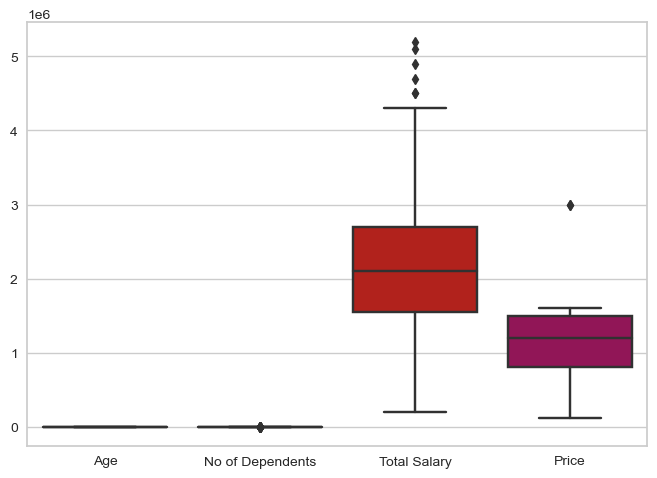

In [21]:
sns.boxplot(data=df)

# Visualization

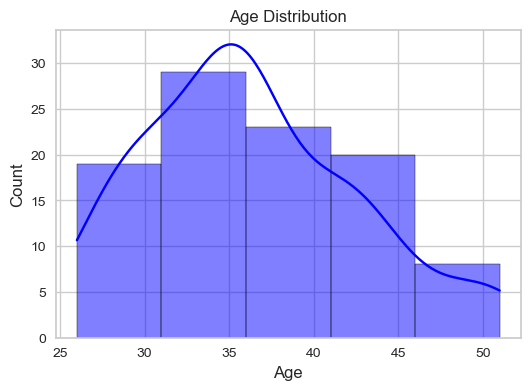

In [16]:
# Plot 1: Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=5, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



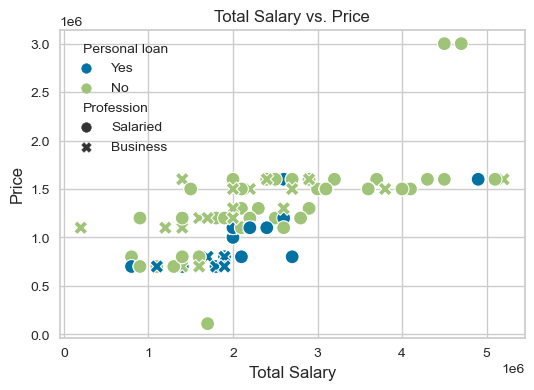

In [17]:
# Plot 2: Salary vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Total Salary'], y=df['Price'], hue=df['Personal loan'], style=df['Profession'], s=100)
plt.title('Total Salary vs. Price')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.show()



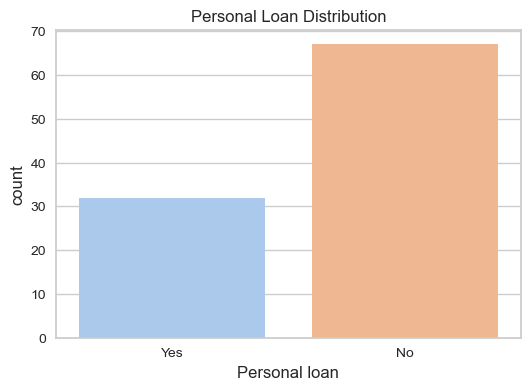

In [18]:
# Plot 3: Personal Loan Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal loan', data=df, palette='pastel')
plt.title('Personal Loan Distribution')
plt.show()



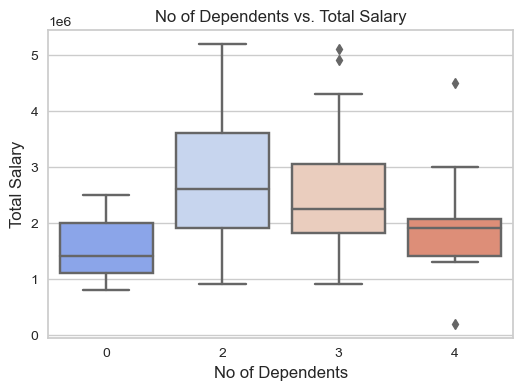

In [19]:
# Plot 4: Dependents vs. Total Salary
plt.figure(figsize=(6, 4))
sns.boxplot(x='No of Dependents', y='Total Salary', data=df, palette='coolwarm')
plt.title('No of Dependents vs. Total Salary')
plt.xlabel('No of Dependents')
plt.ylabel('Total Salary')
plt.show()



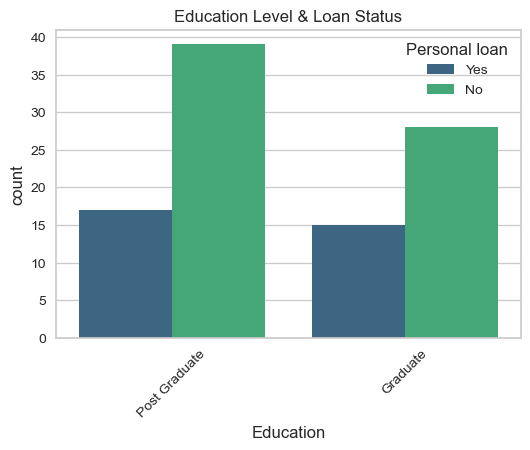

In [20]:
# Plot 5: Education & Profession Impact on Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Personal loan', data=df, palette='viridis')
plt.title('Education Level & Loan Status')
plt.xticks(rotation=45)
plt.show()


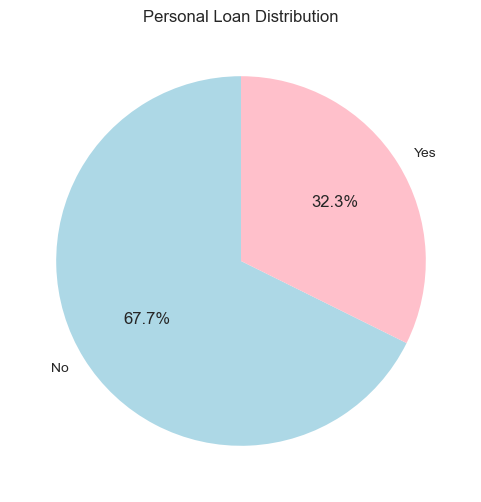

In [22]:
# Pie Chart 1: Personal Loan Distribution
plt.figure(figsize=(6, 6))
df['Personal loan'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title('Personal Loan Distribution')
plt.ylabel('')
plt.show()



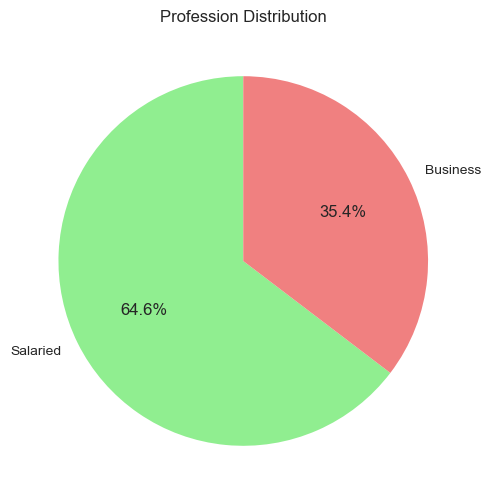

In [23]:
# Pie Chart 2: Profession Distribution
plt.figure(figsize=(6, 6))
df['Profession'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Profession Distribution')
plt.ylabel('')
plt.show()



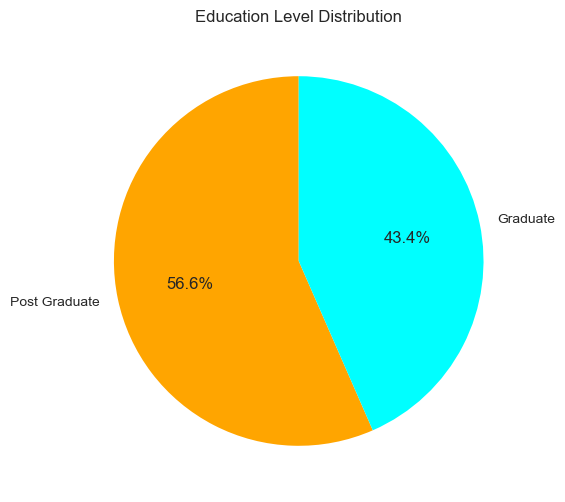

In [24]:
# Pie Chart 3: Education Level Distribution
plt.figure(figsize=(6, 6))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'cyan'], startangle=90)
plt.title('Education Level Distribution')
plt.ylabel('')
plt.show()



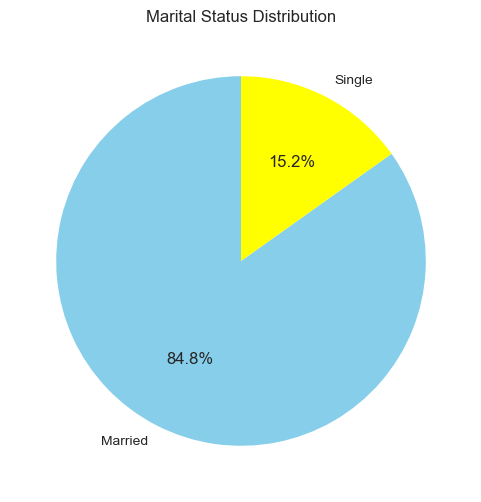

In [33]:
# Pie Chart 4: Marital Status Distribution
plt.figure(figsize=(6, 6))
df['Marrital Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'yellow'], startangle=90)
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()


In [35]:
# Group by Profession and calculate mean salary and price
grouped_df = df.groupby('Profession')[['Total Salary', 'Price']].mean()
print("Grouped Data by Profession:\n", grouped_df)

Grouped Data by Profession:
             Total Salary       Price
Profession                          
Business    1.988571e+06  1120000.00
Salaried    2.425000e+06  1234531.25


# feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Defining categorical columns
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan']

# Defining numerical columns
numerical_columns = ['Age', 'No of Dependents', 'Total Salary', 'Price']


In [46]:
# Creating a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns), 
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [47]:
# Apply transformations
processed_data = preprocessor.fit_transform(df)


In [48]:
processed_data

array([[-1.4986304 , -1.64231252, -1.40676   , ...,  1.        ,
         0.        ,  1.        ],
       [-0.21130364, -0.13685938, -0.25893659, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.39785482,  1.36859377, -0.4502405 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.36334989, -0.13685938, -0.06763269, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.36334989, -0.13685938,  1.65410242, ...,  1.        ,
         1.        ,  0.        ],
       [ 2.36334989, -0.13685938, -0.06763269, ...,  1.        ,
         0.        ,  1.        ]])

In [49]:
# Converting to DataFrame for better visualization
processed_df = pd.DataFrame(processed_data, columns=['Age', 'No of Dependents', 'Total Salary', 'Price', 
                                                    'Profession_Business', 'Profession_Salaried', 
                                                    'Marital Status_Married', 'Marital Status_Single', 
                                                    'Education_Graduate', 'Education_Post Graduate', 
                                                    'Personal Loan_No', 'Personal Loan_Yes'])

processed_df

Age  No of Dependents  Total Salary     Price  Profession_Business  \
0  -1.498630         -1.642313     -1.406760 -0.904843                  0.0   
1  -0.211304         -0.136859     -0.258937 -0.445579                  0.0   
2   1.397855          1.368594     -0.450240  0.013685                  1.0   
3   0.754191          0.615867     -0.067633  0.013685                  1.0   
4  -0.854967         -0.136859      0.314975  0.932213                  0.0   
..       ...               ...           ...       ...                  ...   
94 -1.498630         -1.642313      0.123671  0.932213                  1.0   
95  2.202434          0.615867      2.706274  0.932213                  0.0   
96  2.363350         -0.136859     -0.067633 -0.215947                  1.0   
97  2.363350         -0.136859      1.654102  0.702581                  0.0   
98  2.363350         -0.136859     -0.067633 -0.215947                  0.0   

    Profession_Salaried  Marital Status_Married  Marital Status_Single  \
0                   1.0                     0.0                    1.0   
1                   1.0                     1.0                    0.0   
2                   0.0                     1.0                    0.0   
3                   0.0                     1.0                    0.0   
4                   1.0                     1.0                    0.0   
..                  ...                     ...                    ...   
94                  0.0                     0.0                    1.0   
95                  1.0                     1.0                    0.0   
96                  0.0                     1.0                    0.0   
97                  1.0                     1.0                    0.0   
98                  1.0                     1.0                    0.0   

    Education_Graduate  Education_Post Graduate  Personal Loan_No  \
0                  0.0                      1.0               0.0   
1                  0.0                      1.0               0.0   
2                  1.0                      0.0               0.0   
3                  0.0                      1.0               1.0   
4                  0.0                      1.0               0.0   
..                 ...                      ...               ...   
94                 1.0                      0.0               1.0   
95                 0.0                      1.0               1.0   
96                 1.0                      0.0               0.0   
97                 0.0                      1.0               1.0   
98                 0.0                      1.0               0.0   

    Personal Loan_Yes  
0                 1.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 1.0  
..                ...  
94                0.0  
95                0.0  
96                1.0  
97                0.0  
98                1.0  

[99 rows x 12 columns]

In [50]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      99 non-null     float64
 1   No of Dependents         99 non-null     float64
 2   Total Salary             99 non-null     float64
 3   Price                    99 non-null     float64
 4   Profession_Business      99 non-null     float64
 5   Profession_Salaried      99 non-null     float64
 6   Marital Status_Married   99 non-null     float64
 7   Marital Status_Single    99 non-null     float64
 8   Education_Graduate       99 non-null     float64
 9   Education_Post Graduate  99 non-null     float64
 10  Personal Loan_No         99 non-null     float64
 11  Personal Loan_Yes        99 non-null     float64
dtypes: float64(12)
memory usage: 9.4 KB


In [53]:
processed_df.to_csv('processed_data.csv', index=False)


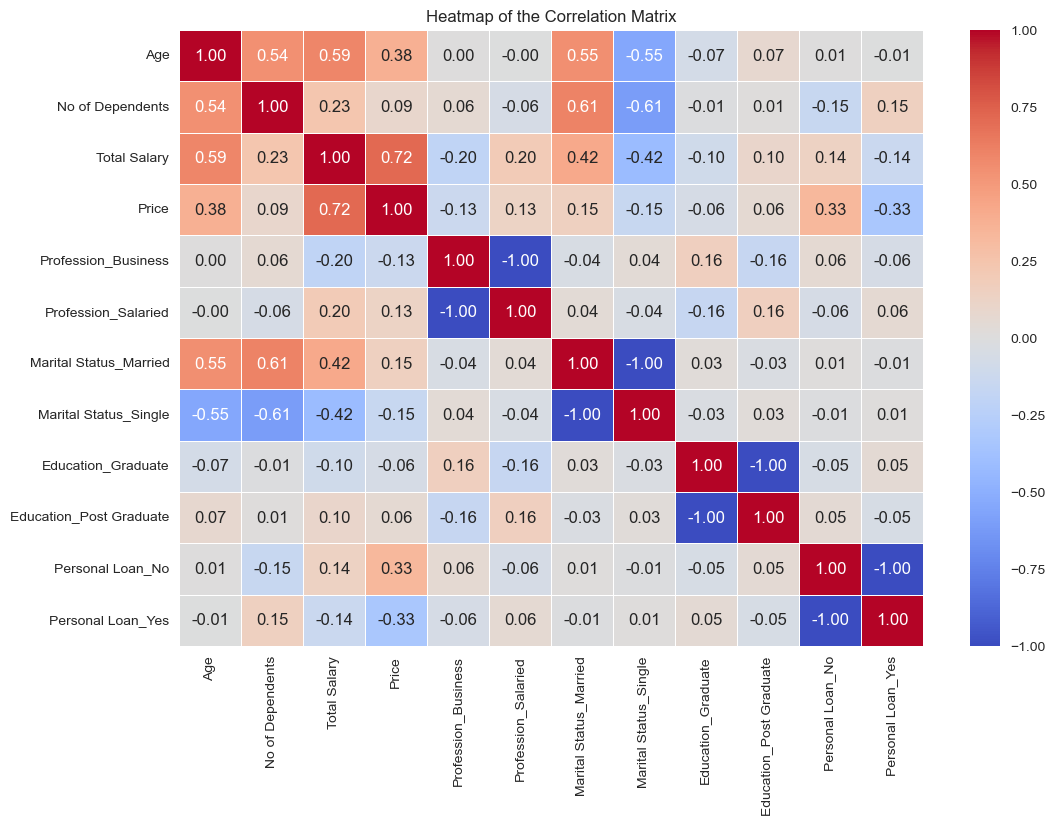

In [55]:
# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(processed_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

# Identify The Which Feature are Importants Using PCA

In [56]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()

In [57]:
pca_data = pca.fit_transform(processed_df)

In [58]:
pca_data

array([[-2.84655317e+00,  7.30785089e-01, -1.10448835e+00, ...,
         2.94770356e-17, -7.66428949e-17,  2.67423491e-18],
       [-4.79705259e-01, -3.44331585e-01, -1.07573870e+00, ...,
         1.85633329e-16,  5.89023595e-17,  4.71906955e-17],
       [ 8.94824883e-01, -1.89258936e+00,  9.43604194e-01, ...,
         1.38319894e-16,  3.65814751e-17,  1.31757713e-17],
       ...,
       [ 9.70636587e-01, -1.16138562e+00,  8.13764249e-01, ...,
        -2.43548646e-17,  2.09289325e-17,  2.48898253e-17],
       [ 2.59774242e+00,  4.54970497e-01, -6.35956816e-01, ...,
         1.43832814e-17,  3.04008051e-17,  7.38115845e-18],
       [ 1.11369789e+00, -8.83851283e-01, -1.04488912e+00, ...,
         2.57289218e-17, -4.32388309e-17,  2.20237999e-17]])

In [59]:
pca_data = pd.DataFrame(pca_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
pca_data

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  -2.846553  0.730785 -1.104488 -0.256102  0.298997  0.584897 -0.575361   
1  -0.479705 -0.344332 -1.075739 -0.317297  0.132271  0.378973 -0.046358   
2   0.894825 -1.892589  0.943604 -0.332740  0.443410  0.542221 -0.766678   
3   0.645882 -0.647109  0.315658  1.171966  0.311830  0.108111  0.038617   
4   0.146914  0.704437 -0.862965 -0.434574 -0.640566  1.055616 -0.055380   
..       ...       ...       ...       ...       ...       ...       ...   
94 -1.179291  2.208746  1.366233 -0.112450 -0.041417  0.740414  0.053792   
95  3.482054  0.414285 -0.678403  0.061338  0.822827 -0.413335  0.504322   
96  0.970637 -1.161386  0.813764 -0.514435  2.038699  0.060873 -0.809621   
97  2.597742  0.454970 -0.635957  0.238156  1.293891 -0.745583 -0.136112   
98  1.113698 -0.883851 -1.044889 -0.165057  1.673303 -0.293555 -1.061310   

         pc8           pc9          pc10          pc11          pc12  
0  -0.197546  1.056966e-16  2.947704e-17 -7.664289e-17  2.674235e-18  
1   0.385171  1.182961e-16  1.856333e-16  5.890236e-17  4.719070e-17  
2   0.074426 -1.707942e-16  1.383199e-16  3.658148e-17  1.317577e-17  
3   0.037376  2.082443e-19  4.160585e-17 -1.580917e-17  1.428362e-17  
4   0.572766 -2.376622e-16  6.732909e-17  3.648706e-16  4.813857e-17  
..       ...           ...           ...           ...           ...  
94 -0.500634  1.548057e-16 -2.853664e-17  3.913438e-18 -3.260041e-17  
95 -0.665243  8.273492e-17  7.925101e-18  5.029180e-17  2.267668e-18  
96  0.244497  2.098354e-16 -2.435486e-17  2.092893e-17  2.488983e-17  
97 -0.225797  5.280301e-17  1.438328e-17  3.040081e-17  7.381158e-18  
98  0.302554  6.330784e-17  2.572892e-17 -4.323883e-17  2.202380e-17  

[99 rows x 12 columns]

In [60]:
# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


Explained Variance Ratio: [4.28868877e-01 2.11475614e-01 9.75569677e-02 7.91920566e-02
 6.94547149e-02 5.53486729e-02 3.94456067e-02 1.86574905e-02
 1.89986782e-33 1.29154101e-33 5.60432424e-34 2.22555249e-34]


In [62]:
# Get the explained variance ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_


In [63]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [64]:
pca_data1 = pd.DataFrame({'var':pca.explained_variance_ratio_,'pca_data':['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']})
pca_data1

var pca_data
0   4.288689e-01      pc1
1   2.114756e-01      pc2
2   9.755697e-02      pc3
3   7.919206e-02      pc4
4   6.945471e-02      pc5
5   5.534867e-02      pc6
6   3.944561e-02      pc7
7   1.865749e-02      pc8
8   1.899868e-33      pc9
9   1.291541e-33     pc10
10  5.604324e-34     pc11
11  2.225552e-34     pc12

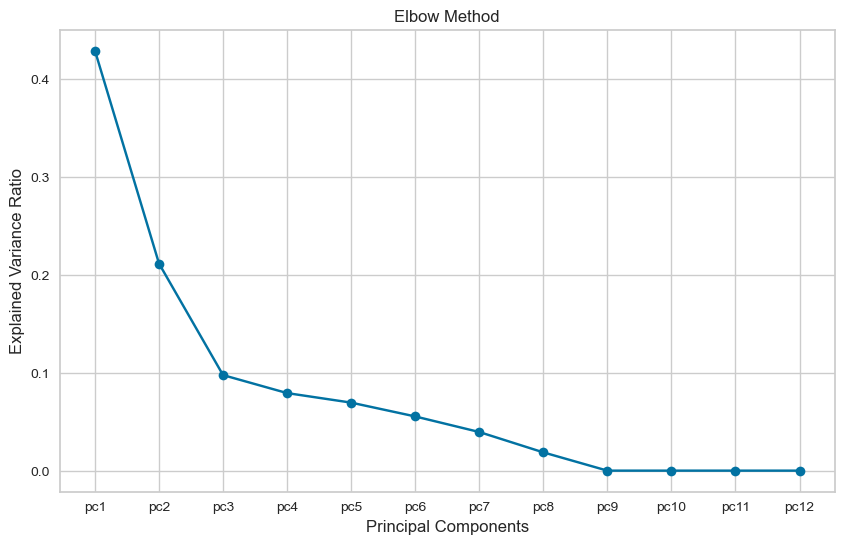

In [65]:
pca_data1 = pd.DataFrame({'var':pca.explained_variance_ratio_,'pca_data':['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']})

plt.figure(figsize=(10,6))
plt.plot(pca_data1['pca_data'], pca_data1['var'], marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method')
plt.show()

<Axes: xlabel='pca_data', ylabel='var'>

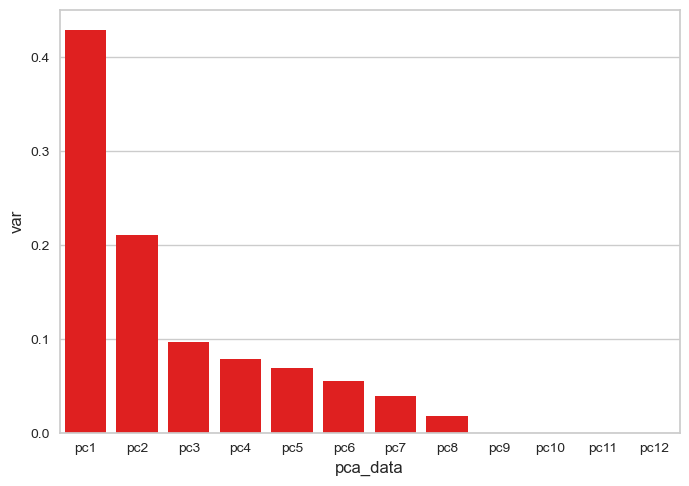

In [66]:
sns.barplot(x='pca_data',y="var",data=pca_data1,color ='red')

# model building

# 1. PCA

In [67]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(processed_df)

In [68]:
pca_data.shape

(99, 4)

In [69]:
# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


Explained Variance Ratio: [0.42886888 0.21147561 0.09755697 0.07919206]


In [70]:
# Create a DataFram
# Print summary statisticse with the reduced dimensions
pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3","PC4"])

print(pca_data.describe().T)

     count          mean       std       min       25%       50%       75%  \
PC1   99.0  6.728624e-17  1.563600 -3.022404 -0.991953 -0.033759  0.963176   
PC2   99.0 -2.242875e-17  1.097978 -1.947299 -0.867146  0.022406  0.808019   
PC3   99.0  6.728624e-17  0.745749 -1.171269 -0.586130 -0.136148  0.430585   
PC4   99.0  3.364312e-18  0.671899 -1.374335 -0.494299  0.106038  0.435243   

          max  
PC1  4.864782  
PC2  2.779555  
PC3  1.463186  
PC4  1.396771  


In [71]:
pca_data.head()

PC1       PC2       PC3       PC4
0 -2.846553  0.730785 -1.104488 -0.256102
1 -0.479705 -0.344332 -1.075739 -0.317297
2  0.894825 -1.892589  0.943604 -0.332740
3  0.645882 -0.647109  0.315658  1.171966
4  0.146914  0.704437 -0.862965 -0.434574

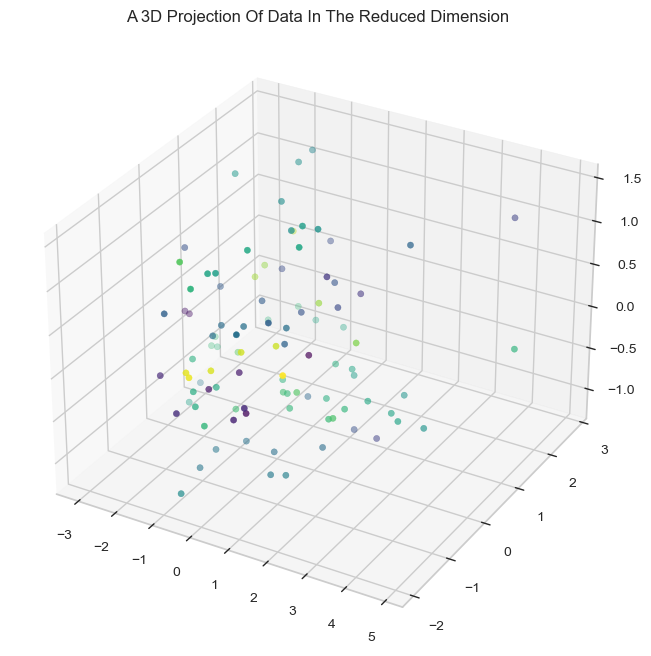

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_data["PC1"], pca_data["PC2"], pca_data["PC3"], c=pca_data["PC4"], cmap="viridis", marker="o")

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Construction of Dendogram

In [73]:
# Construction of Dendogram 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


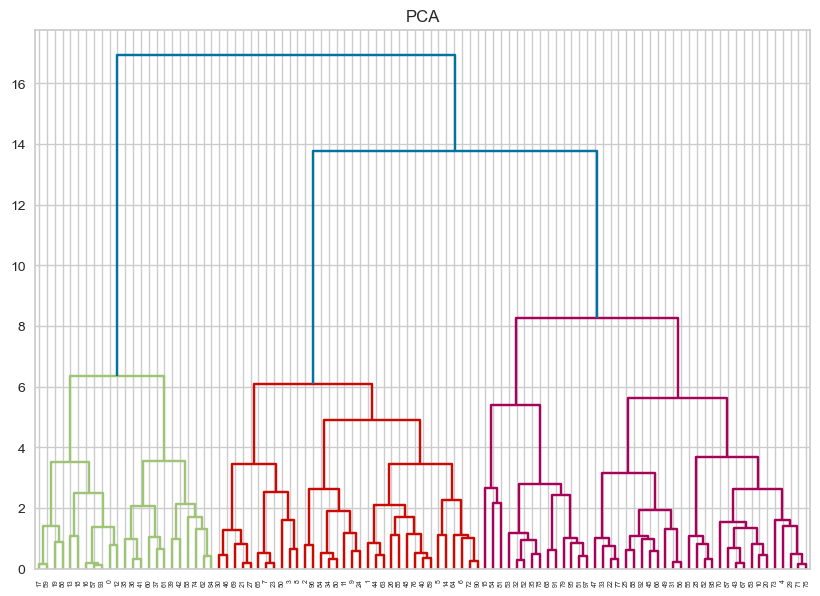

In [74]:
plt.figure(figsize=(10,7))
plt.title('PCA')
dend = shc.dendrogram(shc.linkage(pca_data,method='ward',metric='euclidean'))

# 2. AgglomerativeClustering¶

In [75]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward',)
agg_labels = agg_clustering.fit_predict(pca_data)


In [76]:
# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame({'PC1': pca_data['PC1'], 'PC2': pca_data['PC2'], 'PC3': pca_data['PC3'], 'PC4': pca_data['PC4'], 'Cluster': agg_labels})

# Print the cluster labels
print(cluster_df['Cluster'].value_counts())

2    34
1    28
0    23
3    14
Name: Cluster, dtype: int64


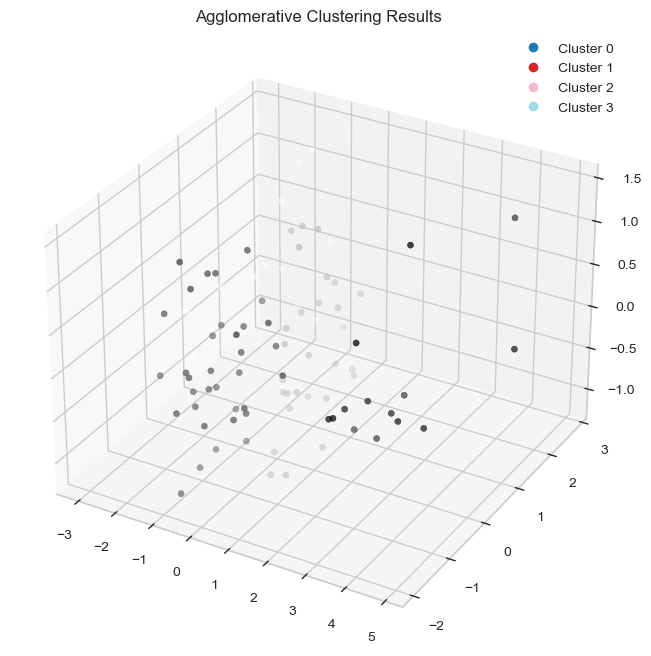

In [77]:
# 3D Projection of Agglomerative Clustering Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cluster_df['PC1'], cluster_df['PC2'], cluster_df['PC3'], c=agg_labels)
ax.set_title("Agglomerative Clustering Results")

ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

plt.show()

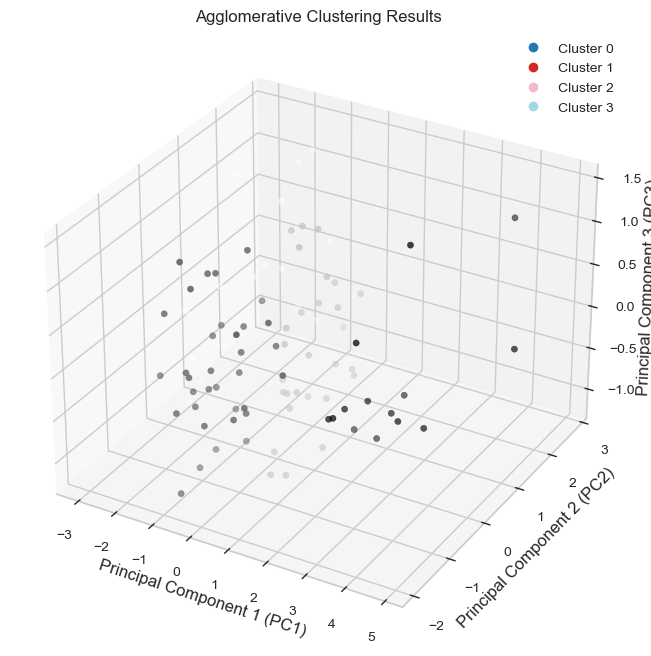

In [78]:
# 3D Projection of Agglomerative Clustering Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cluster_df['PC1'], cluster_df['PC2'], cluster_df['PC3'], c=agg_labels)

ax.set_xlabel("Principal Component 1 (PC1)")
ax.set_ylabel("Principal Component 2 (PC2)")
ax.set_zlabel("Principal Component 3 (PC3)")
ax.set_title("Agglomerative Clustering Results")

ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

plt.show()

# 3. KMeans¶

In [87]:
from sklearn.cluster import KMeans

# Assume cluster_df is your DataFrame with PC1, PC2, and PC3 PC4 columns

# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data[['PC1', 'PC2', 'PC3','PC4']])


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [88]:
# Get the cluster labels
labels = kmeans.labels_

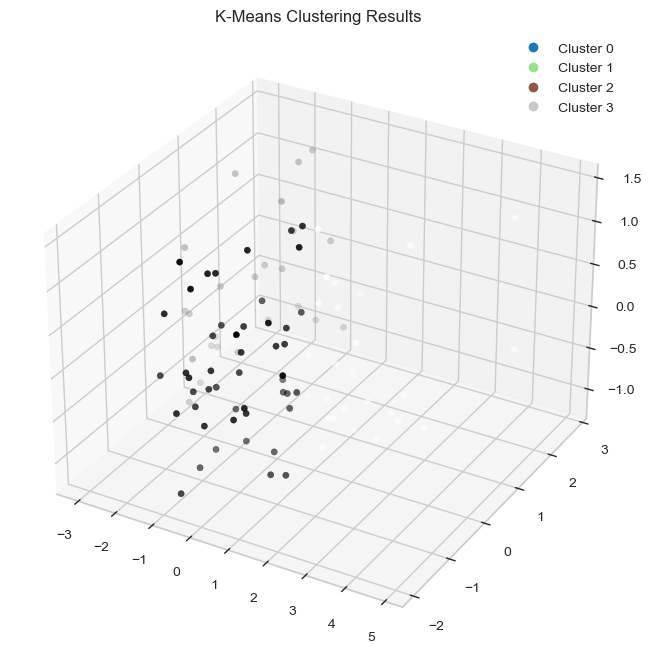

In [89]:
import matplotlib.pyplot as plt

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=labels)
ax.set_title("K-Means Clustering Results")
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / 4)) for i in range(4)])
plt.show()



# 4. DBSCAN

In [84]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
dbscan_model.fit(pca_data)

# Get the cluster labels
labels = dbscan_model.labels_

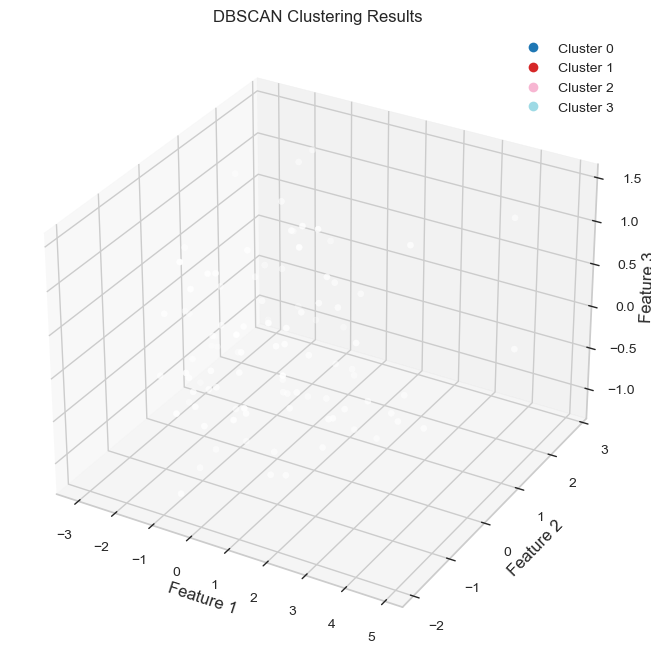

In [85]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=labels)

# Set the axis labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set the title
ax.set_title('DBSCAN Clustering Results')
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

# Show the plot
plt.show()

# Model Evaluation

In [90]:
from sklearn.metrics import silhouette_score

silhouette_agg = silhouette_score(pca_data, agg_labels)
silhouette_kmeans = silhouette_score(pca_data, kmeans.labels_)
silhouette_dbscan = silhouette_score(pca_data, labels)

print("Agglomerative Clustering Silhouette Score:", silhouette_agg)
print("K-Means Clustering Silhouette Score:", silhouette_kmeans)
print("DBSCAN Clustering Silhouette Score:", silhouette_dbscan)

Agglomerative Clustering Silhouette Score: 0.254200005117624
K-Means Clustering Silhouette Score: 0.2999280545872211
DBSCAN Clustering Silhouette Score: 0.2999280545872211


Text(0.5, 1.0, 'Silhouette Scores for Different Clustering Algorithms')

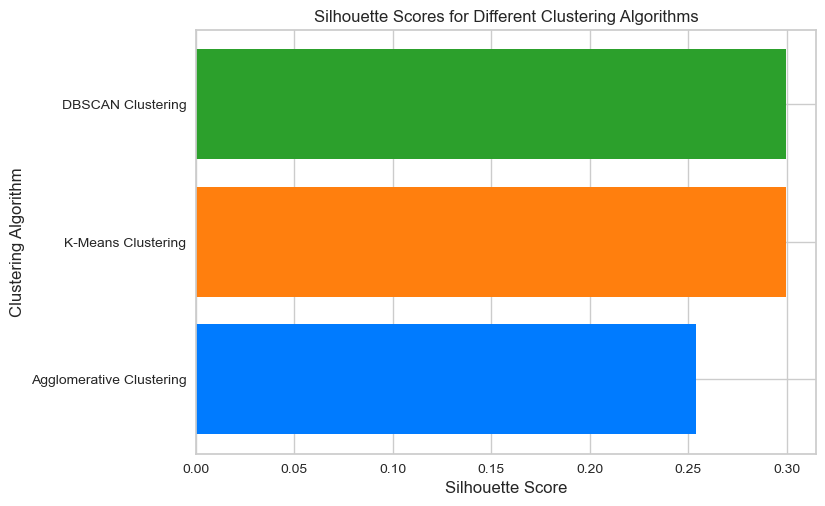

In [91]:
silhouette_scores = [silhouette_agg, silhouette_kmeans, silhouette_dbscan]
clustering_algorithms = ['Agglomerative Clustering', 'K-Means Clustering', 'DBSCAN Clustering']

# Use a horizontal bar chart with custom colors
plt.barh(clustering_algorithms, silhouette_scores, color=['#007bff', '#ff7f0e', '#2ca02c'])
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Algorithm')
plt.title('Silhouette Scores for Different Clustering Algorithms')
